# Genetic Algorithm (Global Search) - 8 Queens Problem


In [1]:
#!pip install python-tsp --quiet
#from python_tsp.exact import solve_tsp_dynamic_programming
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants, experiment parameters
POPULATION_SIZE = 7000
NUM_PARENTS = 7000
MUTATION_RATE = 0.1
NUM_CIDADES = 26
INT_MAX = 100
TARGET = 937
MUTATION_STEP = 4
SELECTION_PRESSURE = 2

In [3]:
import math
# get cities info
def getCityXY():
    cities = []
    f = open('bays29xy.txt')
    for i in f.readlines():
        node_city_val = i.split()
        cities.append(
            [float(node_city_val[1]), float(node_city_val[2])]
        )

    return cities


# calculating distance of two cities
def calcDistance(cityA, cityB):
    d = math.sqrt(
            math.pow(cityB[0] - cityA[0], 2) + math.pow(cityB[1] - cityA[1], 2)
        )
    return d

def getCityMatrix(filepath):
    with open(filepath, 'r') as file:
    # Read all lines from the file
      lines = file.readlines()

    # Convert each line to a list of integers
    matrix = [list(map(int, line.split())) for line in lines]

    # Now, 'matrix' is a list of lists representing the matrix
    #print(matrix)
    return matrix


In [6]:
class Individuo:
    def __init__(self, genoma, fitness):
        self.genoma = genoma
        self.fitness = fitness

    def __lt__(self, other):
        return self.fitness < other.fitness

    def __gt__(self, other):
        return self.fitness > other.fitness

    def __eq__(self, other):
        return self.fitness == other.fitness


def veriricar_repetiu(arr, n):
    for i in range(len(arr)):
        if arr[i] == n:
            return True

global cidades

# cidades = [
#             [0, 107, 241, 190, 124, 80, 316, 76, 152, 157, 283, 133, 113, 297, 228, 129, 348, 276, 188, 150, 65, 341, 184, 67, 221, 169, 108, 45, 167],
# [107, 0, 148, 137, 88, 127, 336, 183, 134, 95, 254, 180, 101, 234, 175, 176, 265, 199, 182, 67, 42, 278, 271, 146, 251, 105, 191, 139, 79],
# [241, 148, 0, 374, 171, 259, 509, 317, 217, 232, 491, 312, 280, 391, 412, 349, 422, 356, 355, 204, 182, 435, 417, 292, 424, 116, 337, 273, 77],
# [190, 137, 374, 0, 202, 234, 222, 192, 248, 42, 117, 287, 79, 107, 38, 121, 152, 86, 68, 70, 137, 151, 239, 135, 137, 242, 165, 228, 205],
# [124, 88, 171, 202, 0, 61, 392, 202, 46, 160, 319, 112, 163, 322, 240, 232, 314, 287, 238, 155, 65, 366, 300, 175, 307, 57, 220, 121, 97],
# [80, 127, 259, 234, 61, 0, 386, 141, 72, 167, 351, 55, 157, 331, 272, 226, 362, 296, 232, 164, 85, 375, 249, 147, 301, 118, 188, 60, 185],
# [316, 336, 509, 222, 392, 386, 0, 233, 438, 254, 202, 439, 235, 254, 210, 187, 313, 266, 154, 282, 321, 298, 168, 249, 95, 437, 190, 314, 435],
# [76, 183, 317, 192, 202, 141, 233, 0, 213, 188, 272, 193, 131, 302, 233, 98, 344, 289, 177, 216, 141, 346, 108, 57, 190, 245, 43, 81, 243],
# [152, 134, 217, 248, 46, 72, 438, 213, 0, 206, 365, 89, 209, 368, 286, 278, 360, 333, 284, 201, 111, 412, 321, 221, 353, 72, 266, 132, 111],
# [157, 95, 232, 42, 160, 167, 254, 188, 206, 0, 159, 220, 57, 149, 80, 132, 193, 127, 100, 28, 95, 193, 241, 131, 169, 200, 161, 189, 163],
# [283, 254, 491, 117, 319, 351, 202, 272, 365, 159, 0, 404, 176, 106, 79, 161, 165, 141, 95, 187, 254, 103, 279, 215, 117, 359, 216, 308, 322],
# [133, 180, 312, 287, 112, 55, 439, 193, 89, 220, 404, 0, 210, 384, 325, 279, 415, 349, 285, 217, 138, 428, 310, 200, 354, 169, 241, 112, 238],
# [113, 101, 280, 79, 163, 157, 235, 131, 209, 57, 176, 210, 0, 186, 117, 75, 231, 165, 81, 85, 92, 230, 184, 74, 150, 208, 104, 158, 206],
# [297, 234, 391, 107, 322, 331, 254, 302, 368, 149, 106, 384, 186, 0, 69, 191, 59, 35, 125, 167, 255, 44, 309, 245, 169, 327, 246, 335, 288],
# [228, 175, 412, 38, 240, 272, 210, 233, 286, 80, 79, 325, 117, 69, 0, 122, 122, 56, 56, 108, 175, 113, 240, 176, 125, 280, 177, 266, 243],
# [129, 176, 349, 121, 232, 226, 187, 98, 278, 132, 161, 279, 75, 191, 122, 0, 244, 178, 66, 160, 161, 235, 118, 62, 92, 277, 55, 155, 275],
# [348, 265, 422, 152, 314, 362, 313, 344, 360, 193, 165, 415, 231, 59, 122, 244, 0, 66, 178, 198, 286, 77, 362, 287, 228, 358, 299, 380, 319],
# [276, 199, 356, 86, 287, 296, 266, 289, 333, 127, 141, 349, 165, 35, 56, 178, 66, 0, 112, 132, 220, 79, 296, 232, 181, 292, 233, 314, 253],
# [188, 182, 355, 68, 238, 232, 154, 177, 284, 100, 95, 285, 81, 125, 56, 66, 178, 112, 0, 128, 167, 169, 179, 120, 69, 283, 121, 213, 281],
# [150, 67, 204, 70, 155, 164, 282, 216, 201, 28, 187, 217, 85, 167, 108, 160, 198, 132, 128, 0, 88, 211, 269, 159, 197, 172, 189, 182, 135],
# [65, 42, 182, 137, 65, 85, 321, 141, 111, 95, 254, 138, 92, 255, 175, 161, 286, 220, 167, 88, 0, 299, 229, 104, 236, 110, 149, 97, 108],
# [341, 278, 435, 151, 366, 375, 298, 346, 412, 193, 103, 428, 230, 44, 113, 235, 77, 79, 169, 211, 299, 0, 353, 289, 213, 371, 290, 379, 332],
# [184, 271, 417, 239, 300, 249, 168, 108, 321, 241, 279, 310, 184, 309, 240, 118, 362, 296, 179, 269, 229, 353, 0, 121, 162, 345, 80, 189, 342],
# [67, 146, 292, 135, 175, 147, 249, 57, 221, 131, 215, 200, 74, 245, 176, 62, 287, 232, 120, 159, 104, 289, 121, 0, 154, 220, 41, 93, 218],
# [221, 251, 424, 137, 307, 301, 95, 190, 353, 169, 117, 354, 150, 169, 125, 92, 228, 181, 69, 197, 236, 213, 162, 154, 0, 352, 147, 247, 350],
# [169, 105, 116, 242, 57, 118, 437, 245, 72, 200, 359, 169, 208, 327, 280, 277, 358, 292, 283, 172, 110, 371, 345, 220, 352, 0, 265, 178, 39],
# [108, 191, 337, 165, 220, 188, 190, 43, 266, 161, 216, 241, 104, 246, 177, 55, 299, 233, 121, 189, 149, 290, 80, 41, 147, 265, 0, 124, 263],
# [45, 139, 273, 228, 121, 60, 314, 81, 132, 189, 308, 112, 158, 335, 266, 155, 380, 314, 213, 182, 97, 379, 189, 93, 247, 178, 124, 0, 199],
# [167, 79, 77, 205, 97, 185, 435, 243, 111, 163, 322, 238, 206, 288, 243, 275, 319, 253, 281, 135, 108, 332, 342, 218, 350, 39, 263, 199, 0],

#           ]


# cidades = [
#     [0.0,3.0,4.0,2.0,7.0],
#     [3.0,0.0,4.0,6.0,3.0],
#     [4.0,4.0,0.0,5.0,8.0],
#     [2.0,6.0,5.0,0.0,6.0],
#     [7.0,3.0,8.0,6.0,0.0],
# ]



### Functions

In [7]:
# Create the fitness score - How good is a solution?
def fitness_score(genoma):
    score = 0

    for i in range(len(genoma) - 1):
        edge = genoma[i]+1, genoma[i+1]+1
        score += problem.get_weight(*edge)

    return score


In [8]:

# Create the selection operator acording their fitness score
# Select best solutions for next step: crossover
# seleção
import random
from scipy import special as sc

import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def selection(population, num_parents):
     # Calculate the total number of individuals in the population
    probs = [0] * (num_parents)
    for i in range(num_parents):
        
        probs[i] = (SELECTION_PRESSURE-(2*SELECTION_PRESSURE-2)*((i) / (num_parents)))
        
    selected_parents = []
    # Select individuals based on their probabilities

    for i in range(num_parents):
        if random.uniform(0,2) <= probs[i]:
           
            selected_parents.append(population[i])
    return selected_parents

In [9]:
# Create the crossover operator
# Combine features of each solution using a crossover point
# crossover

def pmx(parent1, parent2):

    crossover_point1 = random.randint(1, len(parent1) - 2)
    crossover_point2 = random.randint(crossover_point1 + 1, (len(parent1)-1))


    offspring = [None] * len(parent1)

    offspring[crossover_point1:crossover_point2] = parent1[crossover_point1:crossover_point2]

    for i in range(len(parent2)):
        if parent2[i] not in offspring:
            offspring[i] = parent2[i]
        else:
            if i == (len(offspring)-1):
                offspring[i] = parent2[i]
                break
            temp = parent2[i]
            if i >= crossover_point2 or i < crossover_point1 and i < (len(offspring)-1) :
              while True:
                  if temp not in offspring:
                      offspring[i] = temp
                      break
                  pos = parent1.index(temp)
                  temp2 = parent2[pos]
                  temp = temp2


    offspring[-1] = parent1[-1]

    return Individuo(offspring, fitness_score(offspring))


In [10]:
# Create the routine to mutate a solution
# A operator to create diversity in the population
#mutação
def mutate(genoma):
  for i in range(MUTATION_STEP):
    for x in range(1, len(genoma)-1):
        if random.random() < MUTATION_RATE:
            pos = random.randrange(len(genoma))
            temp = genoma[x]
            if(temp == 0 or genoma[pos] == 0):
               return genoma
            genoma[x] = genoma[pos]
            genoma[pos] = temp


    return genoma

In [11]:
# Print the solution
def print_found_goal(population, to_print=True):
    for ind in population:
        score = ind.fitness

        if score <= TARGET:
            if to_print:
                print(f'{ind.genoma}. Score: {score}')
                print('Solution found')
            return True

    return False


# Print the solution
def print_found_goal_verbose(population, to_print=True):
    for ind in population:
        score = ind.fitness
        if to_print:
            print(f'{ind.genoma}. Score: {score}')
        if score <= TARGET:
            if to_print:
                print('Solution found')
            return True

    if to_print:
        print('Solution not found')
    return False

In [12]:
def selection_all(population):
  selected_parents = population
  return selected_parents

In [13]:
# Create the routine to implement the evolution

# evolução

def evolution(population, generation, selection_method):
    #select individuals to become parents
    offsprings = []

    if(selection_method == "all"):
      parents = selection_all(population)
      random.shuffle(parents)
      for i in range(len(parents)-1):
        offsprings.append(pmx(parent1=parents[i].genoma, parent2=parents[i+1].genoma))
    elif(selection_method == "rank"):
      parents = selection(population, NUM_PARENTS)
      random.shuffle(parents)
      for i in range(len(parents)-1):
        offsprings.append(pmx(parent1=parents[i].genoma, parent2=parents[i+1].genoma))
    elif(selection_method == "tournament"):
      for i in range(NUM_PARENTS):
        offsprings.append(pmx(parent1=k_tournament(population).genoma, parent2=k_tournament(population).genoma))


    for i in range(len(offsprings)):
        offsprings[i].genoma = mutate(offsprings[i].genoma)

    for offspring in offsprings:
        offspring.fitness = fitness_score(offspring.genoma)

    #introduce top-scoring individuals from previous generation and keep top fitness individuals
    new_gen = offsprings

    for i in range(POPULATION_SIZE- len(new_gen)):
        new_gen.append(population[i])
    new_gen.sort()

    return new_gen

In [14]:
# Create the initial population (solutions)

# cria o primeiro vetor
def gerar_genoma():
    genoma = [0]
    ultimo = 0
    while len(genoma) < NUM_CIDADES:
        temp = random.randrange(0, NUM_CIDADES, 1)
        if not veriricar_repetiu(genoma, temp):
            genoma.append(temp)
            ultimo = temp

    genoma.append(0)

    return genoma

# Cria os inidividuos
def generate_population(population_size):
    population = []

    for i in range(population_size):
        genoma = gerar_genoma()
        fitness = fitness_score(genoma)
        population.append(Individuo(genoma=genoma, fitness=fitness))


    return population

In [15]:
# draw cities and answer map
def drawMap(city):
    positions = []
    for i in range(NUM_CIDADES):
        x = cidadesCoord[i][0]
        y = cidadesCoord[i][1]
        plt.plot(x, y, "ro")
        plt.annotate(i, (x, y))
        positions.append((x,y))

    return positions

In [16]:
def drawRoute(positions,answer):
  plt.figure(figsize=(8, 6))
  for i in range(NUM_CIDADES):
    plt.plot(positions[i][0], positions[i][1], "ro")
    plt.annotate(i, (positions[i][0], positions[i][1]))
    try:
              first = positions[answer[i]]
              second = positions[answer[i+1]]
              plt.plot([first[0], second[0]], [first[1], second[1]], "green")
    except:
              continue

  plt.show()

In [17]:
def CompareRoutes(positions, answer, actualSolution):
    plt.figure(figsize=(16, 9))

    # Plot the original route in red
    for i in range(NUM_CIDADES):
        plt.plot(positions[i][0], positions[i][1], "ro")
        plt.annotate(i, (positions[i][0], positions[i][1]))
        try:
            first = positions[answer[i]]
            second = positions[answer[i + 1]]
            plt.plot([first[0], second[0]], [first[1], second[1]], "red", alpha=0.4)
        except IndexError:
            continue

    # Plot the correct route in green
    for i in range(NUM_CIDADES):
        try:
            first = positions[actualSolution[i]]
            second = positions[actualSolution[i + 1]]
            plt.plot([first[0], second[0]], [first[1], second[1]], "green", alpha=0.8)
        except IndexError:
            continue

    plt.show()

# Example usage:
# CompareRoutes(positions, answer, actualSolution)

In [18]:
def showDistribution(population, generation):
   # Get the fitness values of all individuals in the 1000th generation
        fitness_values_1000th_gen = [ind.fitness for ind in population]

        # Plot the fitness values
        plt.figure(figsize=(10, 6))
        plt.plot((fitness_values_1000th_gen), marker='.', markersize=1)
        plt.xlabel('Individual')
        plt.ylabel('Fitness')
        plt.title(f'Fitness Distribution - Generation {generation}')
        plt.show()

In [19]:
def k_tournament(population):
  parents =  sorted(random.choices(population, k=TOURNAMENT_SIZE))
  return parents[0]

### Running the experiment

In [26]:
import time

def run_test(selection_method, generation_limit, convergence_limit,num_of_tests):

  # Constants, experiment parameters

  error_vector = []
  convergence_point = []
  print(problem.name)
  time_vector = []
  for i in range(NUMBER_OF_TESTS):

    print(f"Performing iteration: {i+1}/{NUMBER_OF_TESTS}")
    lowest_solution = Individuo([0], 100000)
    has_converged = False
    has_checked = False
    generation = 0
    limit = 0

    population = generate_population(POPULATION_SIZE)
    population.sort()

    #showDistribution(population, generation)
    #Generations until found the solution
    solution_found = False
    while not solution_found:

          solution_found = print_found_goal(population)
          # if(has_converged == False):
          population = evolution(population, generation, selection_method)
          # if(has_converged == True):
          #   population = evolution(population, generation, "all")


          generation += 1
          #print(generation)
          solution = population[0]
          if(solution.fitness < lowest_solution.fitness):
            lowest_solution = solution

          if(limit <= generation):
            for i in range(convergence_limit):
              if(solution.fitness != population[i+1].fitness):
                has_converged = False
                break
              else:
                limit = generation + 50
                has_converged = True


          if(generation % 2 == 0):
            # print(solution.genoma, solution.fitness)
            print(f'Generation: {generation}')
            # print(f'Mutation Rate: {MUTATION_RATE}')
            #showDistribution(population, generation)


          if(has_converged == True and has_checked == False):
            has_checked = True
            convergence_point.append(generation)
            showDistribution(population, generation)
            break

          if(generation % 1000 == 0):
            showDistribution(population, generation)
            print(population[0].fitness)

          if(generation > generation_limit):
              break

    solution = lowest_solution
    print(solution.genoma, solution.fitness)
    percentage_error = abs(solution.fitness - TARGET) / TARGET * 100

    print(f'Percentage Error: {percentage_error:.2f}%')
    error_vector.append(percentage_error)


  return error_vector, convergence_point




In [27]:
def getResults(test, num_of_generations):
  error_vector = test[0]
  convergence_vector= test[1]

  if(len(convergence_vector) > 0):
    conv = np.array([convergence_vector])
    conv_mean = np.mean(conv)
    conv_std = np.std(conv)
    print(conv)
    print("Conv:", conv_mean)
    print("Deviation:", conv_std)


  error = np.array([error_vector])

  # Calculate mean
  mean_value = np.mean(error)

  # Calculate variance
  variance_value = np.var(error)



  # Calculate standard deviation
  std_deviation_value = np.std(error)
  best = 10000000
  worst = 0
  optimalCount = 0
  for value in error_vector:
    if(value < best):
      best = value
    if(value > worst):
      worst = value
    if(value == 0):
      optimalCount = optimalCount + 1
  # Print the results

  print("Mean Error:", mean_value)

  # Print the result
  print("Standard Deviation:", std_deviation_value)
  print("Worst:", worst*(937/100)+937)
  print("Best:", best*(937/100)+937)
  print(f"Times it found the optimal solution {optimalCount}/{NUMBER_OF_TESTS}")

gr120
Performing iteration: 1/1
Generation: 2
Generation: 4
Generation: 6
Generation: 8
Generation: 10
Generation: 12
Generation: 14
Generation: 16
Generation: 18
Generation: 20
Generation: 22
Generation: 24
Generation: 26
Generation: 28
Generation: 30
Generation: 32
Generation: 34
Generation: 36
Generation: 38
Generation: 40
Generation: 42
Generation: 44
Generation: 46
Generation: 48
Generation: 50
Generation: 52
Generation: 54
Generation: 56
Generation: 58
Generation: 60
Generation: 62
Generation: 64
Generation: 66
Generation: 68
Generation: 70
Generation: 72
Generation: 74
Generation: 76
Generation: 78
Generation: 80
Generation: 82
Generation: 84
Generation: 86
Generation: 88
Generation: 90
Generation: 92
Generation: 94
Generation: 96
Generation: 98
Generation: 100
Generation: 102
Generation: 104
Generation: 106
Generation: 108
Generation: 110
Generation: 112
Generation: 114
Generation: 116
Generation: 118
Generation: 120
Generation: 122
Generation: 124
Generation: 126
Generation: 1

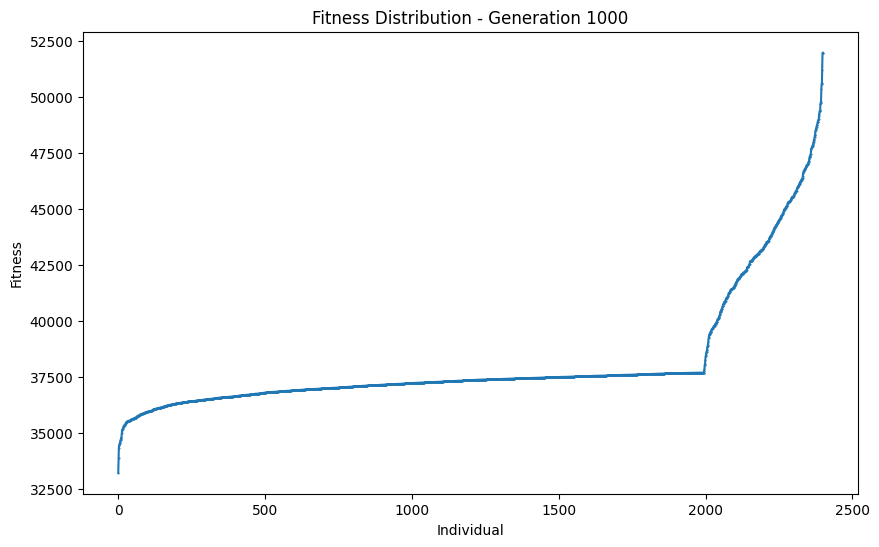

33236
Generation: 1002
Generation: 1004
Generation: 1006
Generation: 1008
Generation: 1010
Generation: 1012
Generation: 1014
Generation: 1016
Generation: 1018
Generation: 1020
Generation: 1022
Generation: 1024
Generation: 1026
Generation: 1028
Generation: 1030
Generation: 1032
Generation: 1034
Generation: 1036
Generation: 1038
Generation: 1040
Generation: 1042
Generation: 1044
Generation: 1046
Generation: 1048
Generation: 1050
Generation: 1052
Generation: 1054
Generation: 1056
Generation: 1058
Generation: 1060
Generation: 1062
Generation: 1064
Generation: 1066
Generation: 1068
Generation: 1070
Generation: 1072
Generation: 1074
Generation: 1076
Generation: 1078
Generation: 1080
Generation: 1082
Generation: 1084
Generation: 1086
Generation: 1088
Generation: 1090
Generation: 1092
Generation: 1094
Generation: 1096
Generation: 1098
Generation: 1100
Generation: 1102
Generation: 1104
Generation: 1106
Generation: 1108
Generation: 1110
Generation: 1112
Generation: 1114
Generation: 1116
Generati

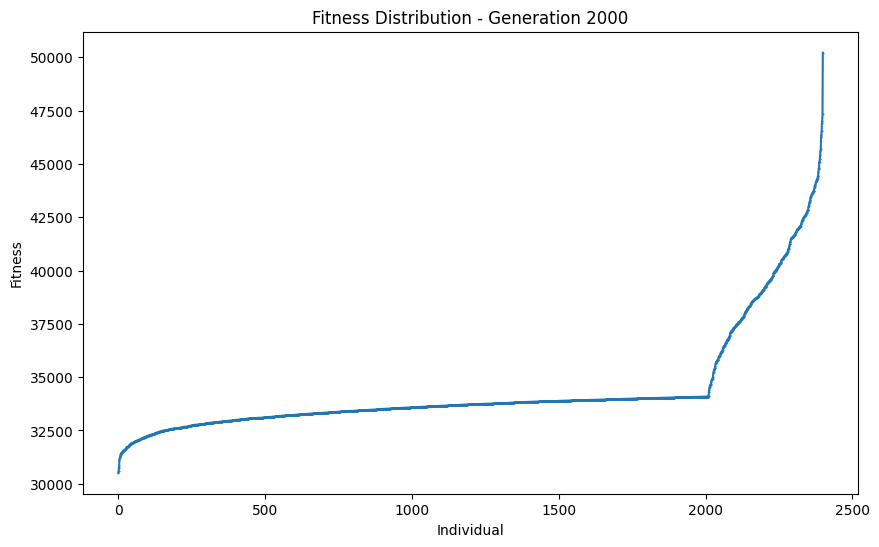

30520
Generation: 2002
Generation: 2004
Generation: 2006
Generation: 2008
Generation: 2010
Generation: 2012
Generation: 2014
Generation: 2016
Generation: 2018
Generation: 2020
Generation: 2022
Generation: 2024
Generation: 2026
Generation: 2028
Generation: 2030
Generation: 2032
Generation: 2034
Generation: 2036
Generation: 2038
Generation: 2040
Generation: 2042
Generation: 2044
Generation: 2046
Generation: 2048
Generation: 2050
Generation: 2052
Generation: 2054
Generation: 2056
Generation: 2058
Generation: 2060
Generation: 2062
Generation: 2064
Generation: 2066
Generation: 2068
Generation: 2070
Generation: 2072
Generation: 2074
Generation: 2076
Generation: 2078
Generation: 2080
Generation: 2082
Generation: 2084
Generation: 2086
Generation: 2088
Generation: 2090
Generation: 2092
Generation: 2094
Generation: 2096
Generation: 2098
Generation: 2100
Generation: 2102
Generation: 2104
Generation: 2106
Generation: 2108
Generation: 2110
Generation: 2112
Generation: 2114
Generation: 2116
Generati

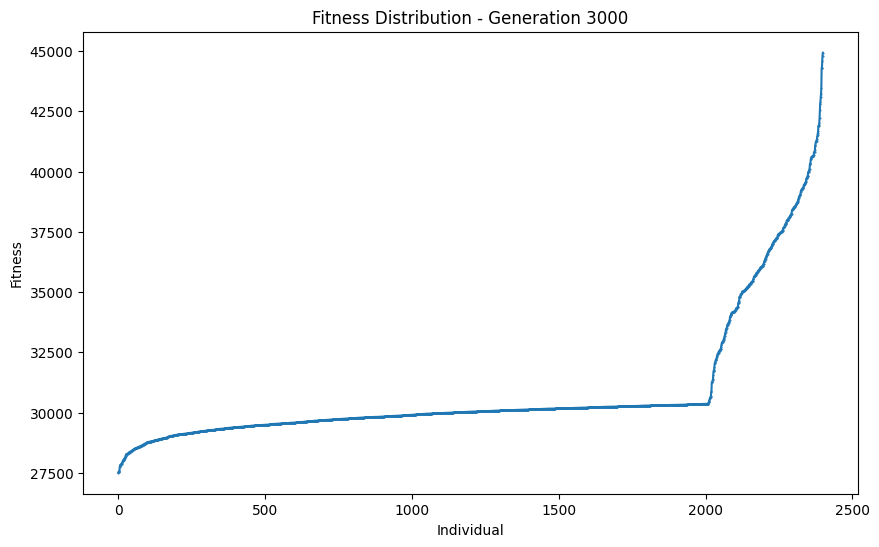

27502
Generation: 3002
Generation: 3004
Generation: 3006
Generation: 3008
Generation: 3010
Generation: 3012
Generation: 3014
Generation: 3016
Generation: 3018
Generation: 3020
Generation: 3022
Generation: 3024
Generation: 3026
Generation: 3028
Generation: 3030
Generation: 3032
Generation: 3034
Generation: 3036
Generation: 3038
Generation: 3040
Generation: 3042
Generation: 3044
Generation: 3046
Generation: 3048
Generation: 3050
Generation: 3052
Generation: 3054
Generation: 3056
Generation: 3058
Generation: 3060
Generation: 3062
Generation: 3064
Generation: 3066
Generation: 3068
Generation: 3070
Generation: 3072
Generation: 3074
Generation: 3076
Generation: 3078
Generation: 3080
Generation: 3082
Generation: 3084
Generation: 3086
Generation: 3088
Generation: 3090
Generation: 3092
Generation: 3094
Generation: 3096
Generation: 3098
Generation: 3100
Generation: 3102
Generation: 3104
Generation: 3106
Generation: 3108
Generation: 3110
Generation: 3112
Generation: 3114
Generation: 3116
Generati

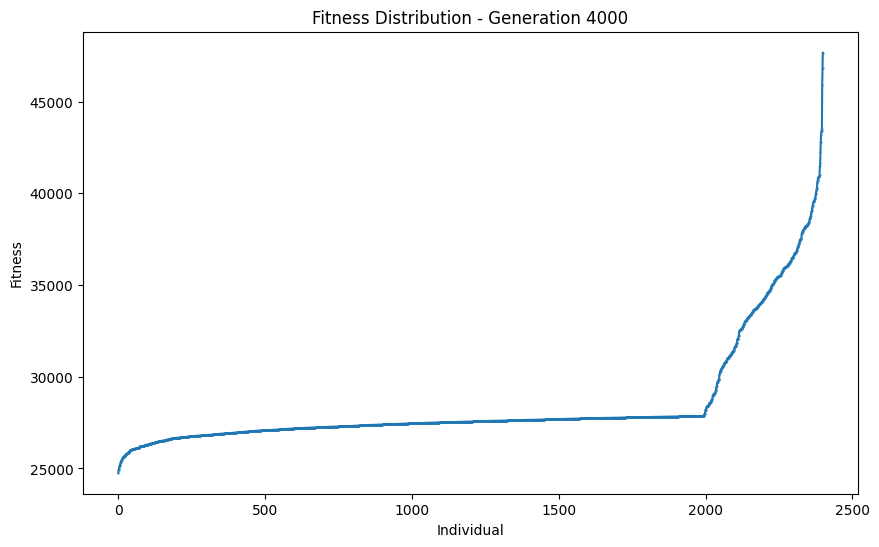

24766
Generation: 4002
Generation: 4004
Generation: 4006
Generation: 4008
Generation: 4010
Generation: 4012
Generation: 4014
Generation: 4016
Generation: 4018
Generation: 4020
Generation: 4022
Generation: 4024
Generation: 4026
Generation: 4028
Generation: 4030
Generation: 4032
Generation: 4034
Generation: 4036
Generation: 4038
Generation: 4040
Generation: 4042
Generation: 4044
Generation: 4046
Generation: 4048
Generation: 4050
Generation: 4052
Generation: 4054
Generation: 4056
Generation: 4058
Generation: 4060
Generation: 4062
Generation: 4064
Generation: 4066
Generation: 4068
Generation: 4070
Generation: 4072
Generation: 4074
Generation: 4076
Generation: 4078
Generation: 4080
Generation: 4082
Generation: 4084
Generation: 4086
Generation: 4088
Generation: 4090
Generation: 4092
Generation: 4094
Generation: 4096
Generation: 4098
Generation: 4100
Generation: 4102
Generation: 4104
Generation: 4106
Generation: 4108
Generation: 4110
Generation: 4112
Generation: 4114
Generation: 4116
Generati

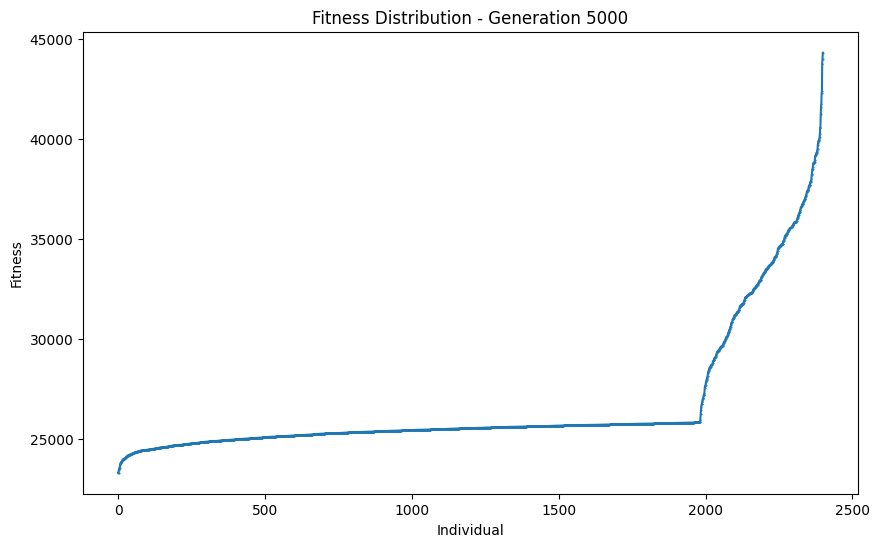

23305
Generation: 5002
Generation: 5004
Generation: 5006
Generation: 5008
Generation: 5010
Generation: 5012
Generation: 5014
Generation: 5016
Generation: 5018
Generation: 5020
Generation: 5022
Generation: 5024
Generation: 5026
Generation: 5028
Generation: 5030
Generation: 5032
Generation: 5034
Generation: 5036
Generation: 5038
Generation: 5040
Generation: 5042
Generation: 5044
Generation: 5046
Generation: 5048
Generation: 5050
Generation: 5052
Generation: 5054
Generation: 5056
Generation: 5058
Generation: 5060
Generation: 5062
Generation: 5064
Generation: 5066
Generation: 5068
Generation: 5070
Generation: 5072
Generation: 5074
Generation: 5076
Generation: 5078
Generation: 5080
Generation: 5082
Generation: 5084
Generation: 5086
Generation: 5088
Generation: 5090
Generation: 5092
Generation: 5094
Generation: 5096
Generation: 5098
Generation: 5100
Generation: 5102
Generation: 5104
Generation: 5106
Generation: 5108
Generation: 5110
Generation: 5112
Generation: 5114
Generation: 5116
Generati

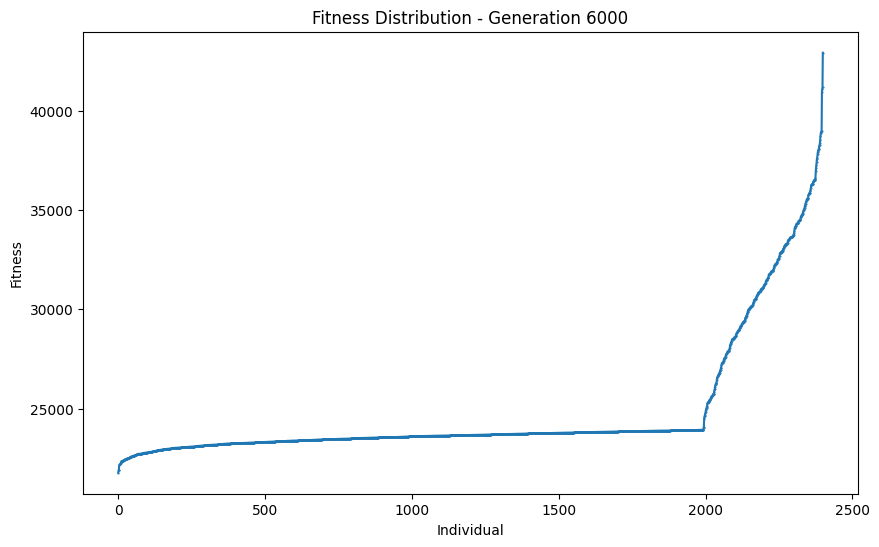

21774
Generation: 6002
Generation: 6004
Generation: 6006
Generation: 6008
Generation: 6010
Generation: 6012
Generation: 6014
Generation: 6016
Generation: 6018
Generation: 6020
Generation: 6022
Generation: 6024
Generation: 6026
Generation: 6028
Generation: 6030
Generation: 6032
Generation: 6034
Generation: 6036
Generation: 6038
Generation: 6040
Generation: 6042
Generation: 6044
Generation: 6046
Generation: 6048
Generation: 6050
Generation: 6052
Generation: 6054
Generation: 6056
Generation: 6058
Generation: 6060
Generation: 6062
Generation: 6064
Generation: 6066
Generation: 6068
Generation: 6070
Generation: 6072
Generation: 6074
Generation: 6076
Generation: 6078
Generation: 6080
Generation: 6082
Generation: 6084
Generation: 6086
Generation: 6088
Generation: 6090
Generation: 6092
Generation: 6094
Generation: 6096
Generation: 6098
Generation: 6100
Generation: 6102
Generation: 6104
Generation: 6106
Generation: 6108
Generation: 6110
Generation: 6112
Generation: 6114
Generation: 6116
Generati

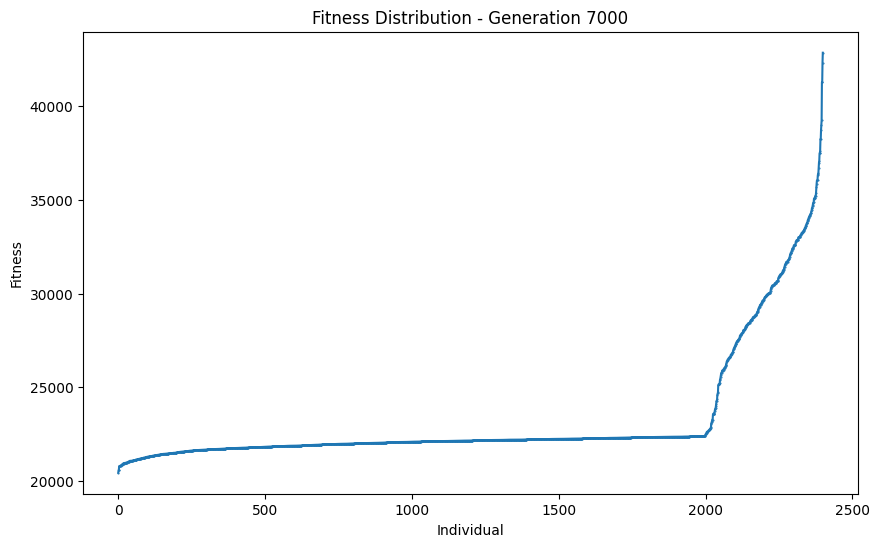

20453
Generation: 7002
Generation: 7004
Generation: 7006
Generation: 7008
Generation: 7010
Generation: 7012
Generation: 7014
Generation: 7016
Generation: 7018
Generation: 7020
Generation: 7022
Generation: 7024
Generation: 7026
Generation: 7028
Generation: 7030
Generation: 7032
Generation: 7034
Generation: 7036
Generation: 7038
Generation: 7040
Generation: 7042
Generation: 7044
Generation: 7046
Generation: 7048
Generation: 7050
Generation: 7052
Generation: 7054
Generation: 7056
Generation: 7058
Generation: 7060
Generation: 7062
Generation: 7064
Generation: 7066
Generation: 7068
Generation: 7070
Generation: 7072
Generation: 7074
Generation: 7076
Generation: 7078
Generation: 7080
Generation: 7082
Generation: 7084
Generation: 7086
Generation: 7088
Generation: 7090
Generation: 7092
Generation: 7094
Generation: 7096
Generation: 7098
Generation: 7100
Generation: 7102
Generation: 7104
Generation: 7106
Generation: 7108
Generation: 7110
Generation: 7112
Generation: 7114
Generation: 7116
Generati

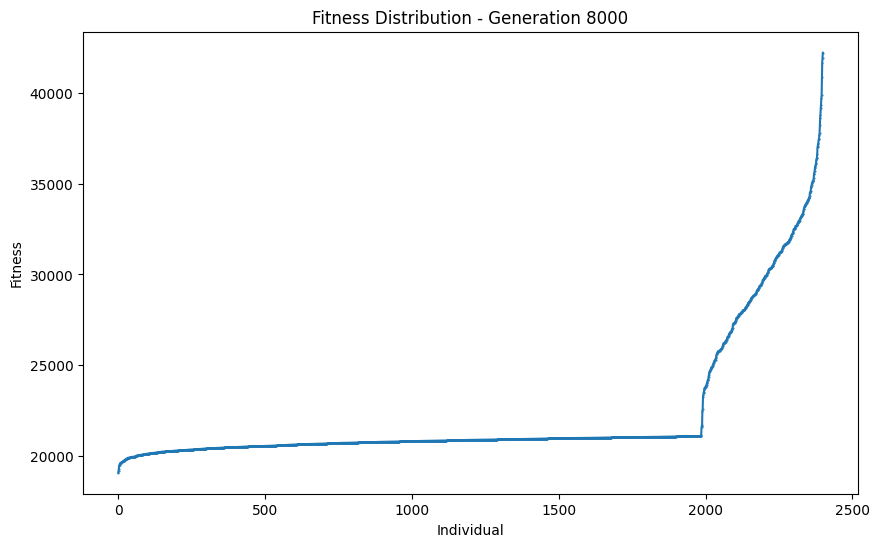

19080
Generation: 8002
Generation: 8004
Generation: 8006
Generation: 8008
Generation: 8010
Generation: 8012
Generation: 8014
Generation: 8016
Generation: 8018
Generation: 8020
Generation: 8022
Generation: 8024
Generation: 8026
Generation: 8028
Generation: 8030
Generation: 8032
Generation: 8034
Generation: 8036
Generation: 8038
Generation: 8040
Generation: 8042
Generation: 8044
Generation: 8046
Generation: 8048
Generation: 8050
Generation: 8052
Generation: 8054
Generation: 8056
Generation: 8058
Generation: 8060
Generation: 8062
Generation: 8064
Generation: 8066
Generation: 8068
Generation: 8070
Generation: 8072
Generation: 8074
Generation: 8076
Generation: 8078
Generation: 8080
Generation: 8082
Generation: 8084
Generation: 8086
Generation: 8088
Generation: 8090
Generation: 8092
Generation: 8094
Generation: 8096
Generation: 8098
Generation: 8100
Generation: 8102
Generation: 8104
Generation: 8106
Generation: 8108
Generation: 8110
Generation: 8112
Generation: 8114
Generation: 8116
Generati

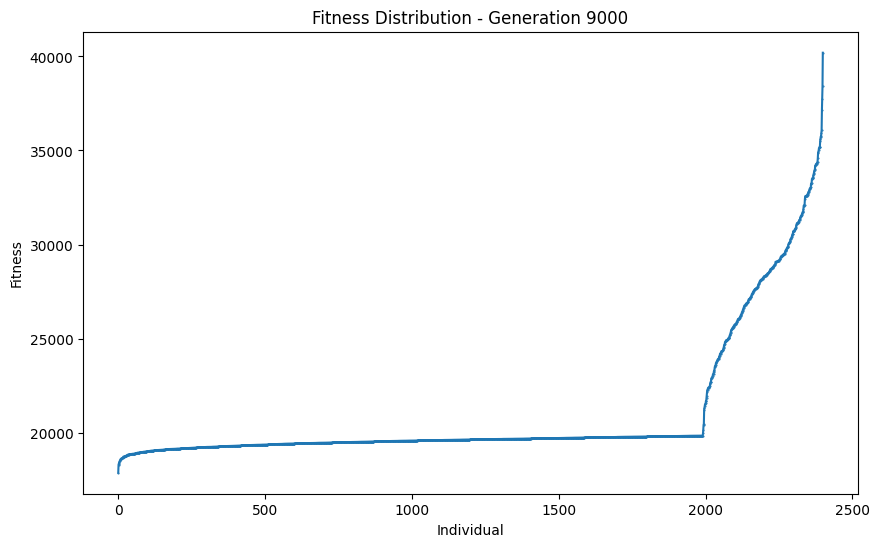

17875
Generation: 9002
Generation: 9004
Generation: 9006
Generation: 9008
Generation: 9010
Generation: 9012
Generation: 9014
Generation: 9016
Generation: 9018
Generation: 9020
Generation: 9022
Generation: 9024
Generation: 9026
Generation: 9028
Generation: 9030
Generation: 9032
Generation: 9034
Generation: 9036
Generation: 9038
Generation: 9040
Generation: 9042
Generation: 9044
Generation: 9046
Generation: 9048
Generation: 9050
Generation: 9052
Generation: 9054
Generation: 9056
Generation: 9058
Generation: 9060
Generation: 9062
Generation: 9064
Generation: 9066
Generation: 9068
Generation: 9070
Generation: 9072
Generation: 9074
Generation: 9076
Generation: 9078
Generation: 9080
Generation: 9082
Generation: 9084
Generation: 9086
Generation: 9088
Generation: 9090
Generation: 9092
Generation: 9094
Generation: 9096
Generation: 9098
Generation: 9100
Generation: 9102
Generation: 9104
Generation: 9106
Generation: 9108
Generation: 9110
Generation: 9112
Generation: 9114
Generation: 9116
Generati

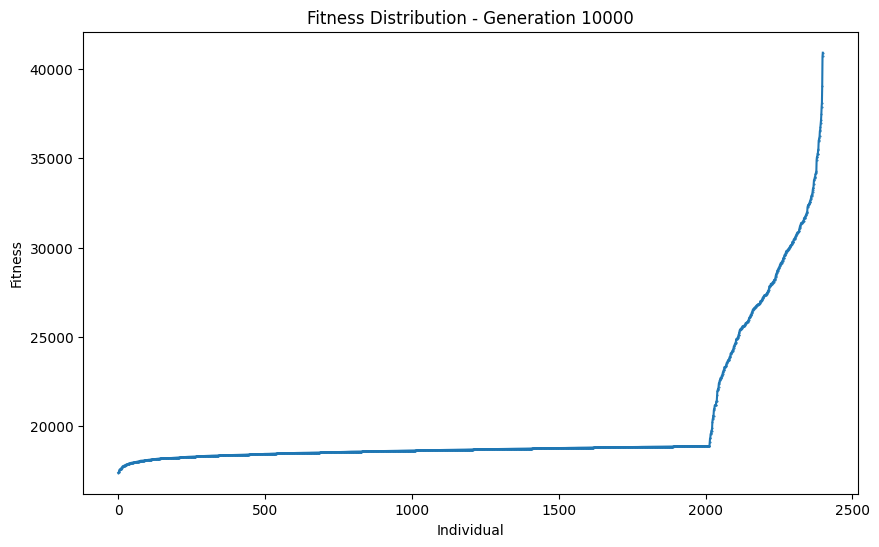

17392
Generation: 10002
Generation: 10004
Generation: 10006
Generation: 10008
Generation: 10010
Generation: 10012
Generation: 10014
Generation: 10016
Generation: 10018
Generation: 10020
Generation: 10022
Generation: 10024
Generation: 10026
Generation: 10028
Generation: 10030
Generation: 10032
Generation: 10034
Generation: 10036
Generation: 10038
Generation: 10040
Generation: 10042
Generation: 10044
Generation: 10046
Generation: 10048
Generation: 10050
Generation: 10052
Generation: 10054
Generation: 10056
Generation: 10058
Generation: 10060
Generation: 10062
Generation: 10064
Generation: 10066
Generation: 10068
Generation: 10070
Generation: 10072
Generation: 10074
Generation: 10076
Generation: 10078
Generation: 10080
Generation: 10082
Generation: 10084
Generation: 10086
Generation: 10088
Generation: 10090
Generation: 10092
Generation: 10094
Generation: 10096
Generation: 10098
Generation: 10100
Generation: 10102
Generation: 10104
Generation: 10106
Generation: 10108
Generation: 10110
Gene

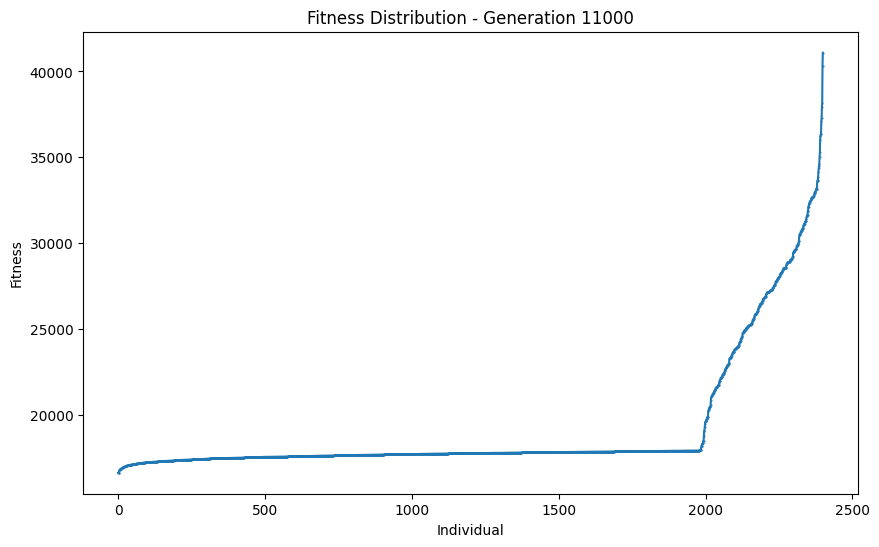

16648
Generation: 11002
Generation: 11004
Generation: 11006
Generation: 11008
Generation: 11010
Generation: 11012
Generation: 11014
Generation: 11016
Generation: 11018
Generation: 11020
Generation: 11022
Generation: 11024
Generation: 11026
Generation: 11028
Generation: 11030
Generation: 11032
Generation: 11034
Generation: 11036
Generation: 11038
Generation: 11040
Generation: 11042
Generation: 11044
Generation: 11046
Generation: 11048
Generation: 11050
Generation: 11052
Generation: 11054
Generation: 11056
Generation: 11058
Generation: 11060
Generation: 11062
Generation: 11064
Generation: 11066
Generation: 11068
Generation: 11070
Generation: 11072
Generation: 11074
Generation: 11076
Generation: 11078
Generation: 11080
Generation: 11082
Generation: 11084
Generation: 11086
Generation: 11088
Generation: 11090
Generation: 11092
Generation: 11094
Generation: 11096
Generation: 11098
Generation: 11100
Generation: 11102
Generation: 11104
Generation: 11106
Generation: 11108
Generation: 11110
Gene

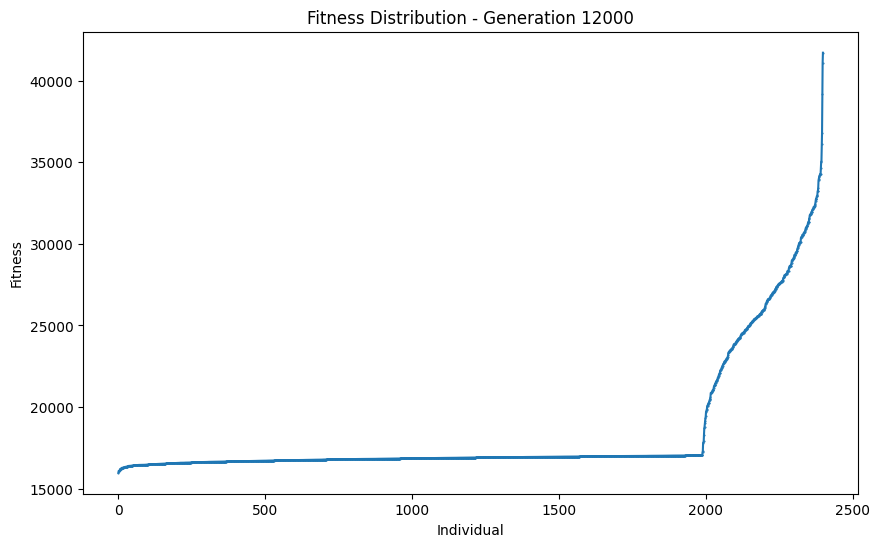

15975
Generation: 12002
Generation: 12004
Generation: 12006
Generation: 12008
Generation: 12010
Generation: 12012
Generation: 12014
Generation: 12016
Generation: 12018
Generation: 12020
Generation: 12022
Generation: 12024
Generation: 12026
Generation: 12028
Generation: 12030
Generation: 12032
Generation: 12034
Generation: 12036
Generation: 12038
Generation: 12040
Generation: 12042
Generation: 12044
Generation: 12046
Generation: 12048
Generation: 12050
Generation: 12052
Generation: 12054
Generation: 12056
Generation: 12058
Generation: 12060
Generation: 12062
Generation: 12064
Generation: 12066
Generation: 12068
Generation: 12070
Generation: 12072
Generation: 12074
Generation: 12076
Generation: 12078
Generation: 12080
Generation: 12082
Generation: 12084
Generation: 12086
Generation: 12088
Generation: 12090
Generation: 12092
Generation: 12094
Generation: 12096
Generation: 12098
Generation: 12100
Generation: 12102
Generation: 12104
Generation: 12106
Generation: 12108
Generation: 12110
Gene

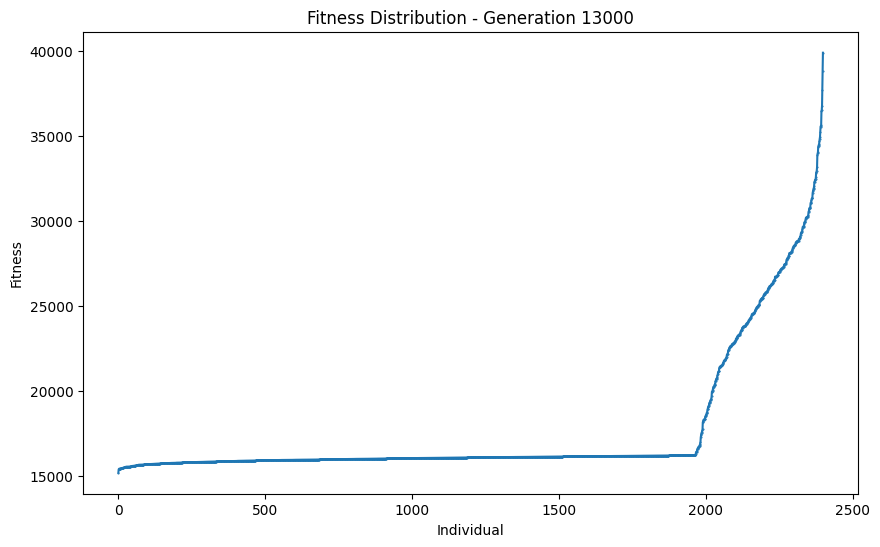

15187
Generation: 13002
Generation: 13004
Generation: 13006
Generation: 13008
Generation: 13010
Generation: 13012
Generation: 13014
Generation: 13016
Generation: 13018
Generation: 13020
Generation: 13022
Generation: 13024
Generation: 13026
Generation: 13028
Generation: 13030
Generation: 13032
Generation: 13034
Generation: 13036
Generation: 13038
Generation: 13040
Generation: 13042
Generation: 13044
Generation: 13046
Generation: 13048
Generation: 13050
Generation: 13052
Generation: 13054
Generation: 13056
Generation: 13058
Generation: 13060
Generation: 13062
Generation: 13064
Generation: 13066
Generation: 13068
Generation: 13070
Generation: 13072
Generation: 13074
Generation: 13076
Generation: 13078
Generation: 13080
Generation: 13082
Generation: 13084
Generation: 13086
Generation: 13088
Generation: 13090
Generation: 13092
Generation: 13094
Generation: 13096
Generation: 13098
Generation: 13100
Generation: 13102
Generation: 13104
Generation: 13106
Generation: 13108
Generation: 13110
Gene

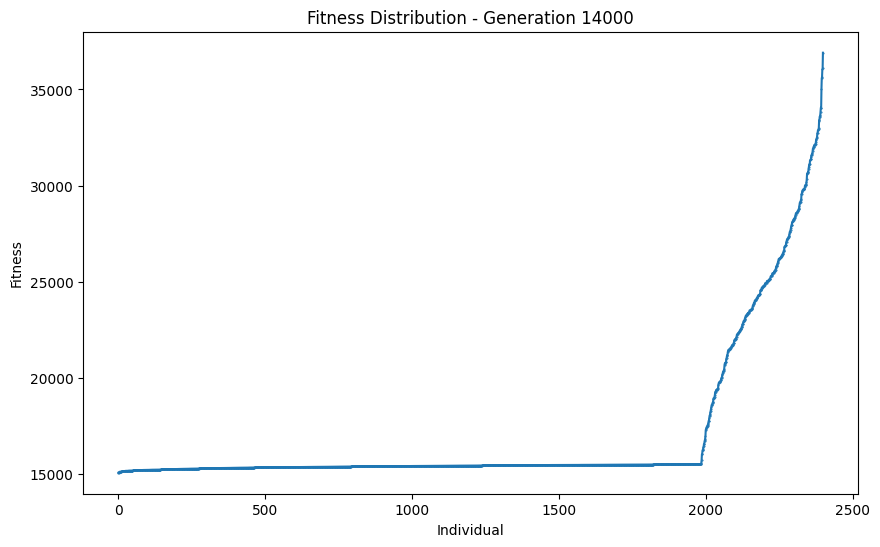

15060
Generation: 14002
Generation: 14004
Generation: 14006
Generation: 14008
Generation: 14010
Generation: 14012
Generation: 14014
Generation: 14016
Generation: 14018
Generation: 14020
Generation: 14022
Generation: 14024
Generation: 14026
Generation: 14028
Generation: 14030
Generation: 14032
Generation: 14034
Generation: 14036
Generation: 14038
Generation: 14040
Generation: 14042
Generation: 14044
Generation: 14046
Generation: 14048
Generation: 14050
Generation: 14052
Generation: 14054
Generation: 14056
Generation: 14058
Generation: 14060
Generation: 14062
Generation: 14064
Generation: 14066
Generation: 14068
Generation: 14070
Generation: 14072
Generation: 14074
Generation: 14076
Generation: 14078
Generation: 14080
Generation: 14082
Generation: 14084
Generation: 14086
Generation: 14088
Generation: 14090
Generation: 14092
Generation: 14094
Generation: 14096
Generation: 14098
Generation: 14100
Generation: 14102
Generation: 14104
Generation: 14106
Generation: 14108
Generation: 14110
Gene

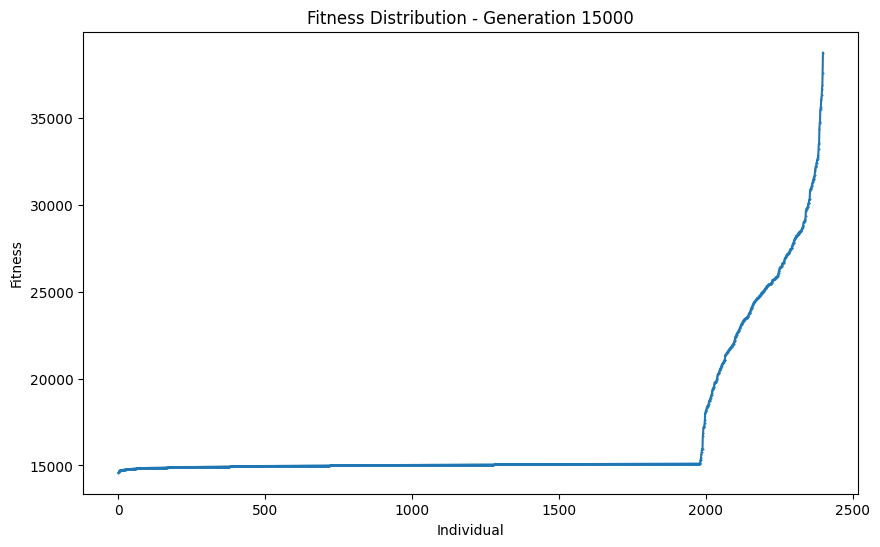

14582
Generation: 15002
Generation: 15004
Generation: 15006
Generation: 15008
Generation: 15010
Generation: 15012
Generation: 15014
Generation: 15016
Generation: 15018
Generation: 15020
Generation: 15022
Generation: 15024
Generation: 15026
Generation: 15028
Generation: 15030
Generation: 15032
Generation: 15034
Generation: 15036
Generation: 15038
Generation: 15040
Generation: 15042
Generation: 15044
Generation: 15046
Generation: 15048
Generation: 15050
Generation: 15052
Generation: 15054
Generation: 15056
Generation: 15058
Generation: 15060
Generation: 15062
Generation: 15064
Generation: 15066
Generation: 15068
Generation: 15070
Generation: 15072
Generation: 15074
Generation: 15076
Generation: 15078
Generation: 15080
Generation: 15082
Generation: 15084
Generation: 15086
Generation: 15088
Generation: 15090
Generation: 15092
Generation: 15094
Generation: 15096
Generation: 15098
Generation: 15100
Generation: 15102
Generation: 15104
Generation: 15106
Generation: 15108
Generation: 15110
Gene

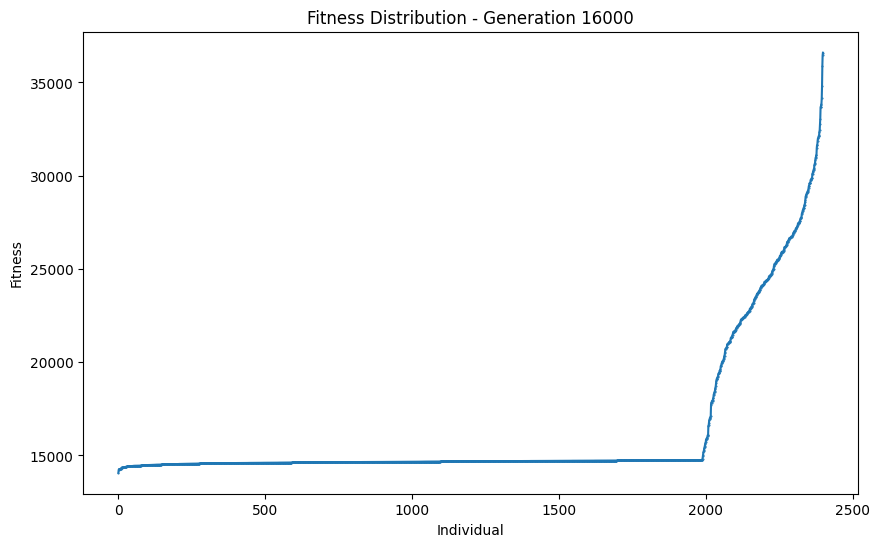

14071
Generation: 16002
Generation: 16004
Generation: 16006
Generation: 16008
Generation: 16010
Generation: 16012
Generation: 16014
Generation: 16016
Generation: 16018
Generation: 16020
Generation: 16022
Generation: 16024
Generation: 16026
Generation: 16028
Generation: 16030
Generation: 16032
Generation: 16034
Generation: 16036
Generation: 16038
Generation: 16040
Generation: 16042
Generation: 16044
Generation: 16046
Generation: 16048
Generation: 16050
Generation: 16052
Generation: 16054
Generation: 16056
Generation: 16058
Generation: 16060
Generation: 16062
Generation: 16064
Generation: 16066
Generation: 16068
Generation: 16070
Generation: 16072
Generation: 16074
Generation: 16076
Generation: 16078
Generation: 16080
Generation: 16082
Generation: 16084
Generation: 16086
Generation: 16088
Generation: 16090
Generation: 16092
Generation: 16094
Generation: 16096
Generation: 16098
Generation: 16100
Generation: 16102
Generation: 16104
Generation: 16106
Generation: 16108
Generation: 16110
Gene

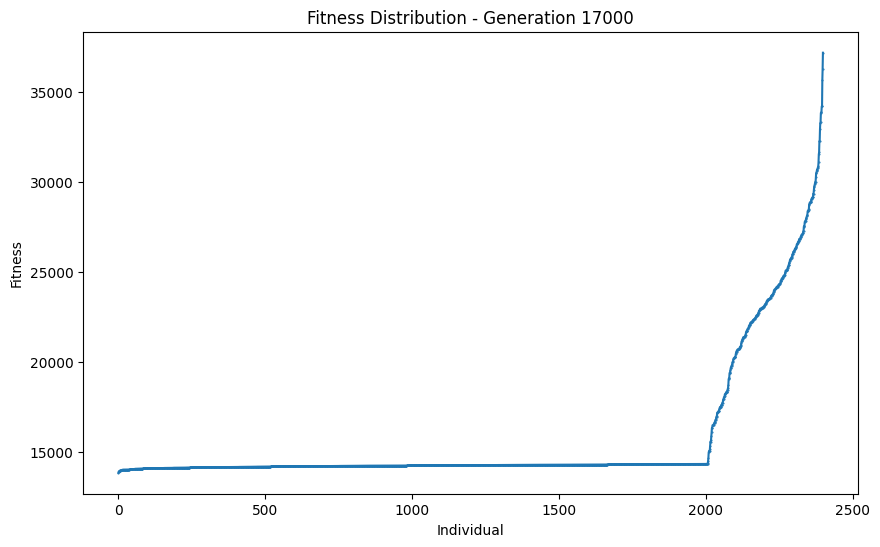

13825
Generation: 17002
Generation: 17004
Generation: 17006
Generation: 17008
Generation: 17010
Generation: 17012
Generation: 17014
Generation: 17016
Generation: 17018
Generation: 17020
Generation: 17022
Generation: 17024
Generation: 17026
Generation: 17028
Generation: 17030
Generation: 17032
Generation: 17034
Generation: 17036
Generation: 17038
Generation: 17040
Generation: 17042
Generation: 17044
Generation: 17046
Generation: 17048
Generation: 17050
Generation: 17052
Generation: 17054
Generation: 17056
Generation: 17058
Generation: 17060
Generation: 17062
Generation: 17064
Generation: 17066
Generation: 17068
Generation: 17070
Generation: 17072
Generation: 17074
Generation: 17076
Generation: 17078
Generation: 17080
Generation: 17082
Generation: 17084
Generation: 17086
Generation: 17088
Generation: 17090
Generation: 17092
Generation: 17094
Generation: 17096
Generation: 17098
Generation: 17100
Generation: 17102
Generation: 17104
Generation: 17106
Generation: 17108
Generation: 17110
Gene

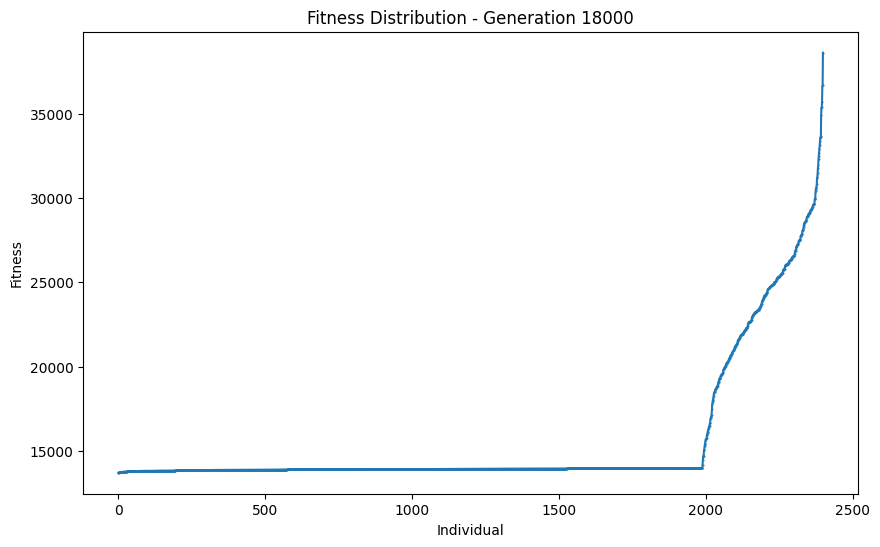

13710
Generation: 18002
Generation: 18004
Generation: 18006
Generation: 18008
Generation: 18010
Generation: 18012
Generation: 18014
Generation: 18016
Generation: 18018
Generation: 18020
Generation: 18022
Generation: 18024
Generation: 18026
Generation: 18028
Generation: 18030
Generation: 18032
Generation: 18034
Generation: 18036
Generation: 18038
Generation: 18040
Generation: 18042
Generation: 18044
Generation: 18046
Generation: 18048
Generation: 18050
Generation: 18052
Generation: 18054
Generation: 18056
Generation: 18058
Generation: 18060
Generation: 18062
Generation: 18064
Generation: 18066
Generation: 18068
Generation: 18070
Generation: 18072
Generation: 18074
Generation: 18076
Generation: 18078
Generation: 18080
Generation: 18082
Generation: 18084
Generation: 18086
Generation: 18088
Generation: 18090
Generation: 18092
Generation: 18094
Generation: 18096
Generation: 18098
Generation: 18100
Generation: 18102
Generation: 18104
Generation: 18106
Generation: 18108
Generation: 18110
Gene

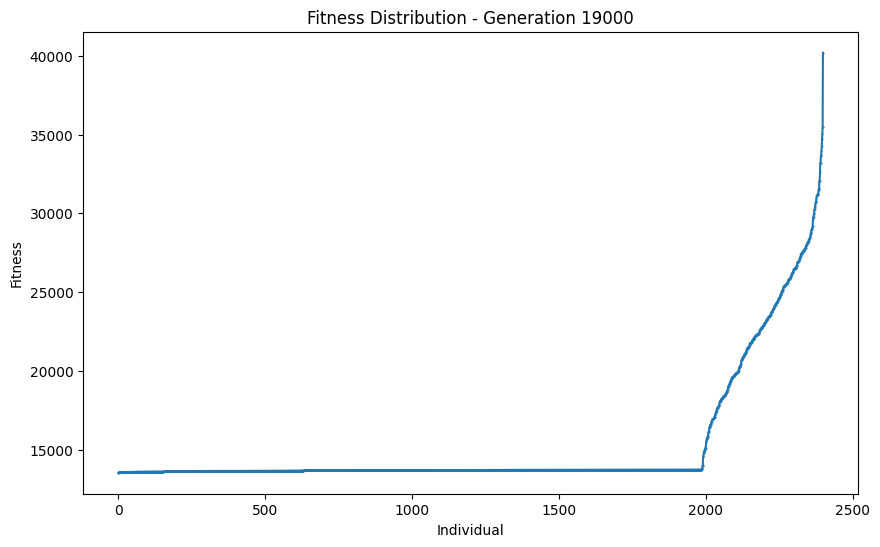

13552
Generation: 19002
Generation: 19004
Generation: 19006
Generation: 19008
Generation: 19010
Generation: 19012
Generation: 19014
Generation: 19016
Generation: 19018
Generation: 19020
Generation: 19022
Generation: 19024
Generation: 19026
Generation: 19028
Generation: 19030
Generation: 19032
Generation: 19034
Generation: 19036
Generation: 19038
Generation: 19040
Generation: 19042
Generation: 19044
Generation: 19046
Generation: 19048
Generation: 19050
Generation: 19052
Generation: 19054
Generation: 19056
Generation: 19058
Generation: 19060
Generation: 19062
Generation: 19064
Generation: 19066
Generation: 19068
Generation: 19070
Generation: 19072
Generation: 19074
Generation: 19076
Generation: 19078
Generation: 19080
Generation: 19082
Generation: 19084
Generation: 19086
Generation: 19088
Generation: 19090
Generation: 19092
Generation: 19094
Generation: 19096
Generation: 19098
Generation: 19100
Generation: 19102
Generation: 19104
Generation: 19106
Generation: 19108
Generation: 19110
Gene

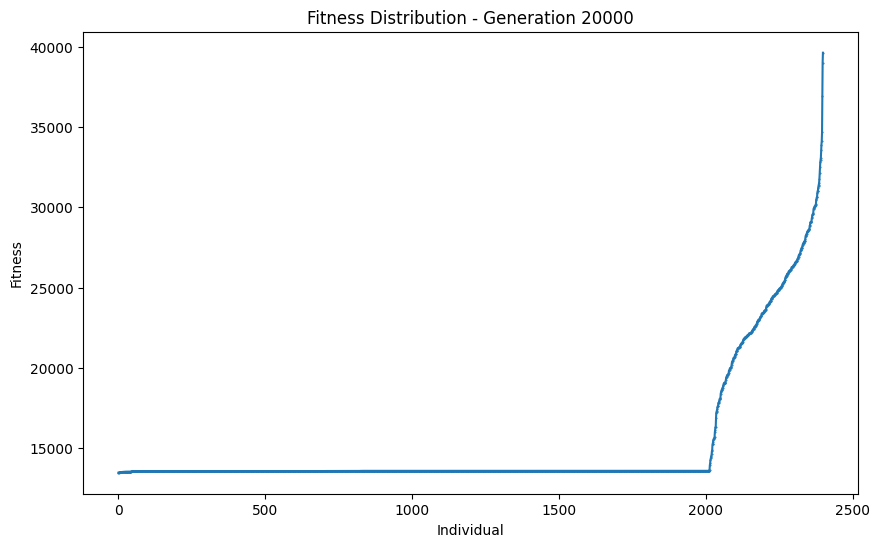

13459
Generation: 20002
Generation: 20004
Generation: 20006
Generation: 20008
Generation: 20010
Generation: 20012
Generation: 20014
Generation: 20016
Generation: 20018
Generation: 20020
Generation: 20022
Generation: 20024
Generation: 20026
Generation: 20028
Generation: 20030
Generation: 20032
Generation: 20034
Generation: 20036
Generation: 20038
Generation: 20040
Generation: 20042
Generation: 20044
Generation: 20046
Generation: 20048
Generation: 20050
Generation: 20052
Generation: 20054
Generation: 20056
Generation: 20058
Generation: 20060
Generation: 20062
Generation: 20064
Generation: 20066
Generation: 20068
Generation: 20070
Generation: 20072
Generation: 20074
Generation: 20076
Generation: 20078
Generation: 20080
Generation: 20082
Generation: 20084
Generation: 20086
Generation: 20088
Generation: 20090
Generation: 20092
Generation: 20094
Generation: 20096
Generation: 20098
Generation: 20100
Generation: 20102
Generation: 20104
Generation: 20106
Generation: 20108
Generation: 20110
Gene

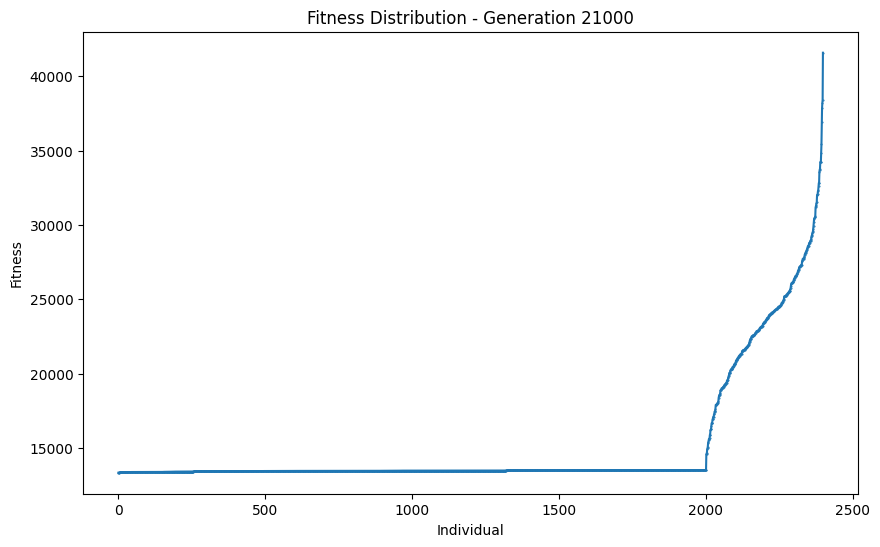

13334
Generation: 21002
Generation: 21004
Generation: 21006
Generation: 21008
Generation: 21010
Generation: 21012
Generation: 21014
Generation: 21016
Generation: 21018
Generation: 21020
Generation: 21022
Generation: 21024
Generation: 21026
Generation: 21028
Generation: 21030
Generation: 21032
Generation: 21034
Generation: 21036
Generation: 21038
Generation: 21040
Generation: 21042
Generation: 21044
Generation: 21046
Generation: 21048
Generation: 21050
Generation: 21052
Generation: 21054
Generation: 21056
Generation: 21058
Generation: 21060
Generation: 21062
Generation: 21064
Generation: 21066
Generation: 21068
Generation: 21070
Generation: 21072
Generation: 21074
Generation: 21076
Generation: 21078
Generation: 21080
Generation: 21082
Generation: 21084
Generation: 21086
Generation: 21088
Generation: 21090
Generation: 21092
Generation: 21094
Generation: 21096
Generation: 21098
Generation: 21100
Generation: 21102
Generation: 21104
Generation: 21106
Generation: 21108
Generation: 21110
Gene

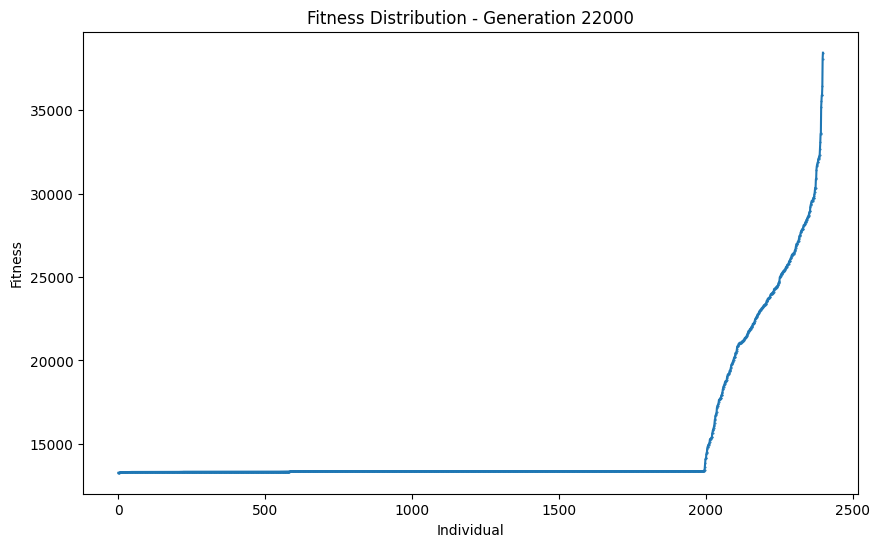

13269
Generation: 22002
Generation: 22004
Generation: 22006
Generation: 22008
Generation: 22010
Generation: 22012
Generation: 22014
Generation: 22016
Generation: 22018
Generation: 22020
Generation: 22022
Generation: 22024
Generation: 22026
Generation: 22028
Generation: 22030
Generation: 22032
Generation: 22034
Generation: 22036
Generation: 22038
Generation: 22040
Generation: 22042
Generation: 22044
Generation: 22046
Generation: 22048
Generation: 22050
Generation: 22052
Generation: 22054
Generation: 22056
Generation: 22058
Generation: 22060
Generation: 22062
Generation: 22064
Generation: 22066
Generation: 22068
Generation: 22070
Generation: 22072
Generation: 22074
Generation: 22076
Generation: 22078
Generation: 22080
Generation: 22082
Generation: 22084
Generation: 22086
Generation: 22088
Generation: 22090
Generation: 22092
Generation: 22094
Generation: 22096
Generation: 22098
Generation: 22100
Generation: 22102
Generation: 22104
Generation: 22106
Generation: 22108
Generation: 22110
Gene

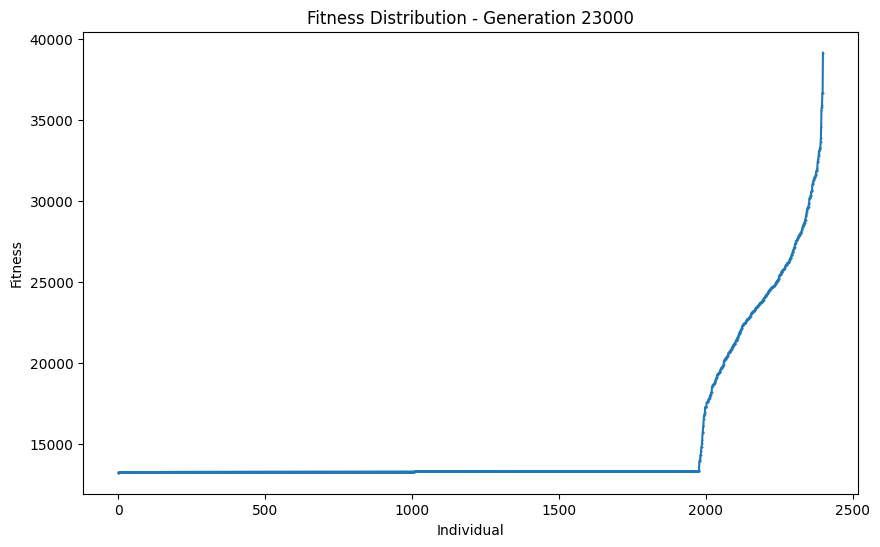

13198
Generation: 23002
Generation: 23004
Generation: 23006
Generation: 23008
Generation: 23010
Generation: 23012
Generation: 23014
Generation: 23016
Generation: 23018
Generation: 23020
Generation: 23022
Generation: 23024
Generation: 23026
Generation: 23028
Generation: 23030
Generation: 23032
Generation: 23034
Generation: 23036
Generation: 23038
Generation: 23040
Generation: 23042
Generation: 23044
Generation: 23046
Generation: 23048
Generation: 23050
Generation: 23052
Generation: 23054
Generation: 23056
Generation: 23058
Generation: 23060
Generation: 23062
Generation: 23064
Generation: 23066
Generation: 23068
Generation: 23070
Generation: 23072
Generation: 23074
Generation: 23076
Generation: 23078
Generation: 23080
Generation: 23082
Generation: 23084
Generation: 23086
Generation: 23088
Generation: 23090
Generation: 23092
Generation: 23094
Generation: 23096
Generation: 23098
Generation: 23100
Generation: 23102
Generation: 23104
Generation: 23106
Generation: 23108
Generation: 23110
Gene

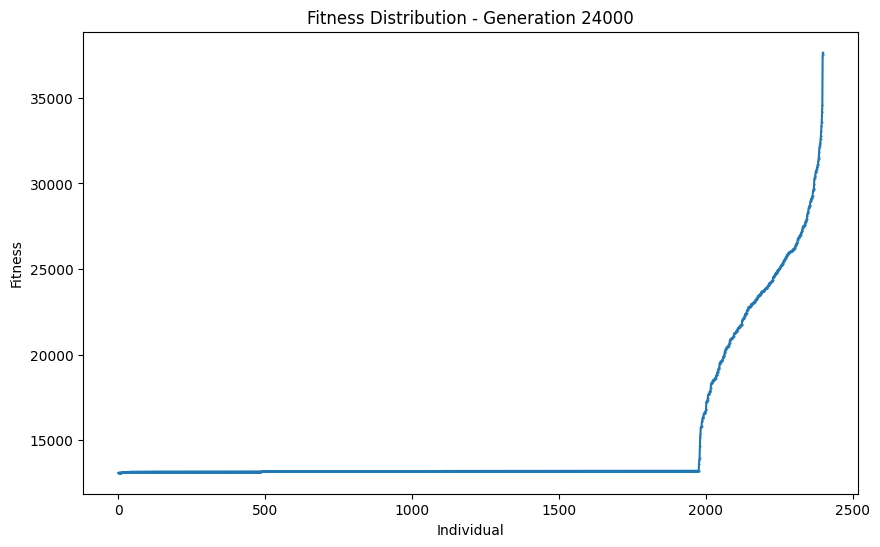

13090
Generation: 24002
Generation: 24004
Generation: 24006
Generation: 24008
Generation: 24010
Generation: 24012
Generation: 24014
Generation: 24016
Generation: 24018
Generation: 24020
Generation: 24022
Generation: 24024
Generation: 24026
Generation: 24028
Generation: 24030
Generation: 24032
Generation: 24034
Generation: 24036
Generation: 24038
Generation: 24040
Generation: 24042
Generation: 24044
Generation: 24046
Generation: 24048
Generation: 24050
Generation: 24052
Generation: 24054
Generation: 24056
Generation: 24058
Generation: 24060
Generation: 24062
Generation: 24064
Generation: 24066
Generation: 24068
Generation: 24070
Generation: 24072
Generation: 24074
Generation: 24076
Generation: 24078
Generation: 24080
Generation: 24082
Generation: 24084
Generation: 24086
Generation: 24088
Generation: 24090
Generation: 24092
Generation: 24094
Generation: 24096
Generation: 24098
Generation: 24100
Generation: 24102
Generation: 24104
Generation: 24106
Generation: 24108
Generation: 24110
Gene

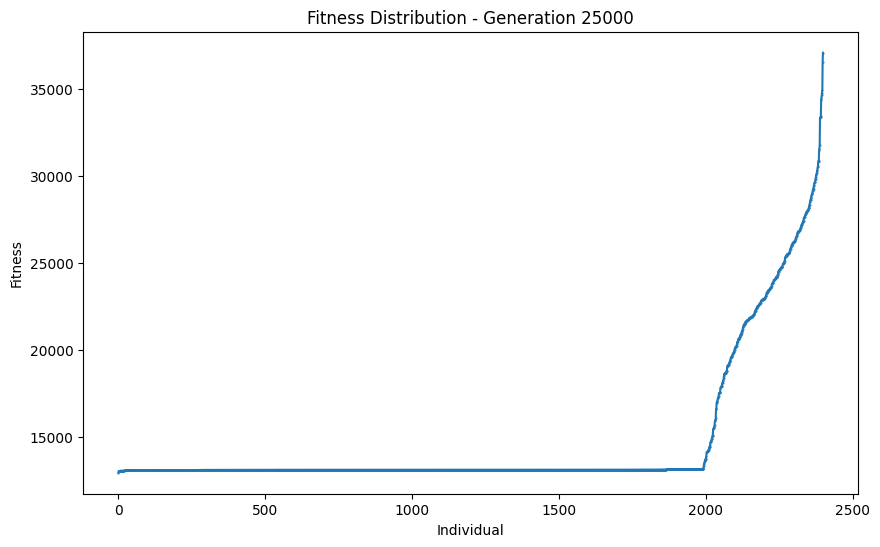

12926
Generation: 25002
Generation: 25004
Generation: 25006
Generation: 25008
Generation: 25010
Generation: 25012
Generation: 25014
Generation: 25016
Generation: 25018
Generation: 25020
Generation: 25022
Generation: 25024
Generation: 25026
Generation: 25028
Generation: 25030
Generation: 25032
Generation: 25034
Generation: 25036
Generation: 25038
Generation: 25040
Generation: 25042
Generation: 25044
Generation: 25046
Generation: 25048
Generation: 25050
Generation: 25052
Generation: 25054
Generation: 25056
Generation: 25058
Generation: 25060
Generation: 25062
Generation: 25064
Generation: 25066
Generation: 25068
Generation: 25070
Generation: 25072
Generation: 25074
Generation: 25076
Generation: 25078
Generation: 25080
Generation: 25082
Generation: 25084
Generation: 25086
Generation: 25088
Generation: 25090
Generation: 25092
Generation: 25094
Generation: 25096
Generation: 25098
Generation: 25100
Generation: 25102
Generation: 25104
Generation: 25106
Generation: 25108
Generation: 25110
Gene

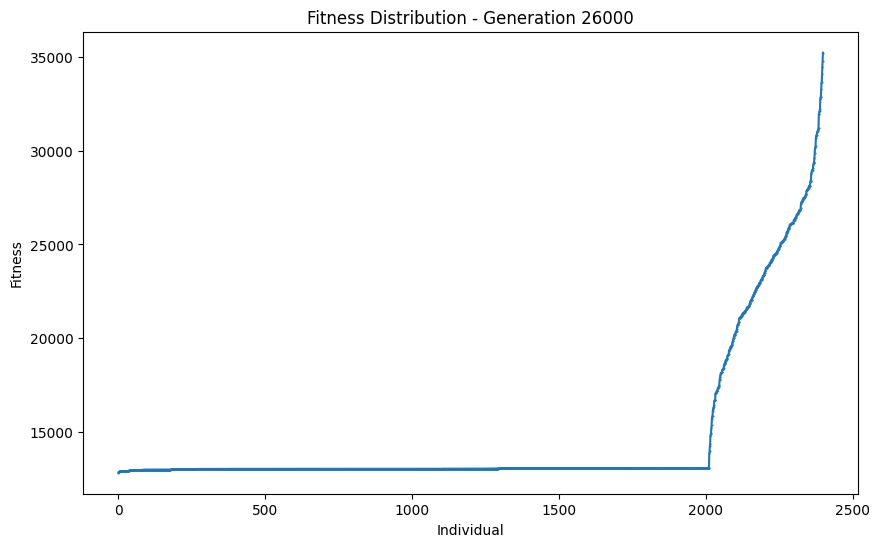

12800
Generation: 26002
Generation: 26004
Generation: 26006
Generation: 26008
Generation: 26010
Generation: 26012
Generation: 26014
Generation: 26016
Generation: 26018
Generation: 26020
Generation: 26022
Generation: 26024
Generation: 26026
Generation: 26028
Generation: 26030
Generation: 26032
Generation: 26034
Generation: 26036
Generation: 26038
Generation: 26040
Generation: 26042
Generation: 26044
Generation: 26046
Generation: 26048
Generation: 26050
Generation: 26052
Generation: 26054
Generation: 26056
Generation: 26058
Generation: 26060
Generation: 26062
Generation: 26064
Generation: 26066
Generation: 26068
Generation: 26070
Generation: 26072
Generation: 26074
Generation: 26076
Generation: 26078
Generation: 26080
Generation: 26082
Generation: 26084
Generation: 26086
Generation: 26088
Generation: 26090
Generation: 26092
Generation: 26094
Generation: 26096
Generation: 26098
Generation: 26100
Generation: 26102
Generation: 26104
Generation: 26106
Generation: 26108
Generation: 26110
Gene

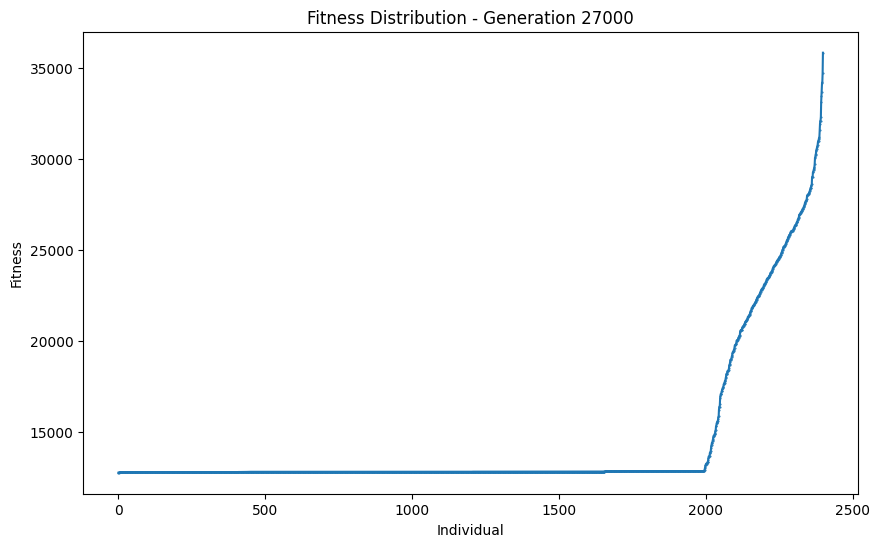

12775
Generation: 27002
Generation: 27004
Generation: 27006
Generation: 27008
Generation: 27010
Generation: 27012
Generation: 27014
Generation: 27016
Generation: 27018
Generation: 27020
Generation: 27022
Generation: 27024
Generation: 27026
Generation: 27028
Generation: 27030
Generation: 27032
Generation: 27034
Generation: 27036
Generation: 27038
Generation: 27040
Generation: 27042
Generation: 27044
Generation: 27046
Generation: 27048
Generation: 27050
Generation: 27052
Generation: 27054
Generation: 27056
Generation: 27058
Generation: 27060
Generation: 27062
Generation: 27064
Generation: 27066
Generation: 27068
Generation: 27070
Generation: 27072
Generation: 27074
Generation: 27076
Generation: 27078
Generation: 27080
Generation: 27082
Generation: 27084
Generation: 27086
Generation: 27088
Generation: 27090
Generation: 27092
Generation: 27094
Generation: 27096
Generation: 27098
Generation: 27100
Generation: 27102
Generation: 27104
Generation: 27106
Generation: 27108
Generation: 27110
Gene

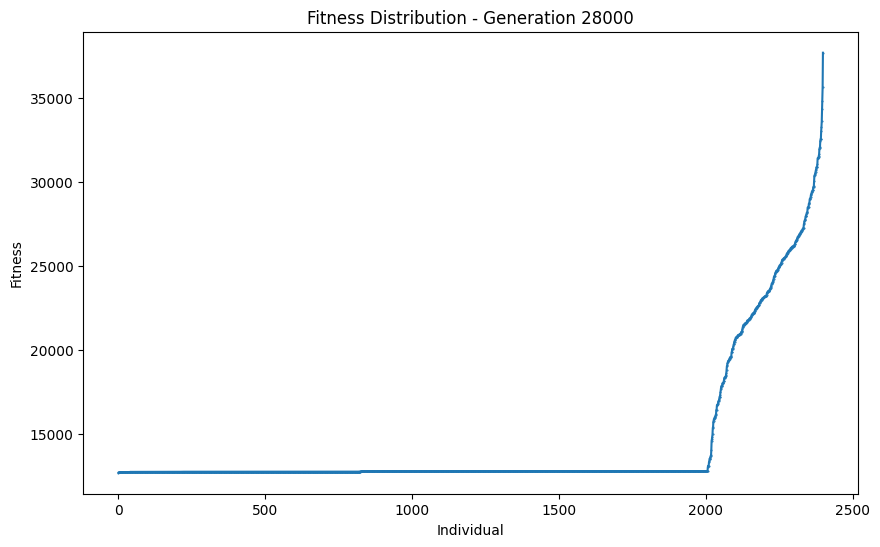

12713
Generation: 28002
Generation: 28004
Generation: 28006
Generation: 28008
Generation: 28010
Generation: 28012
Generation: 28014
Generation: 28016
Generation: 28018
Generation: 28020
Generation: 28022
Generation: 28024
Generation: 28026
Generation: 28028
Generation: 28030
Generation: 28032
Generation: 28034
Generation: 28036
Generation: 28038
Generation: 28040
Generation: 28042
Generation: 28044
Generation: 28046
Generation: 28048
Generation: 28050
Generation: 28052
Generation: 28054
Generation: 28056
Generation: 28058
Generation: 28060
Generation: 28062
Generation: 28064
Generation: 28066
Generation: 28068
Generation: 28070
Generation: 28072
Generation: 28074
Generation: 28076
Generation: 28078
Generation: 28080
Generation: 28082
Generation: 28084
Generation: 28086
Generation: 28088
Generation: 28090
Generation: 28092
Generation: 28094
Generation: 28096
Generation: 28098
Generation: 28100
Generation: 28102
Generation: 28104
Generation: 28106
Generation: 28108
Generation: 28110
Gene

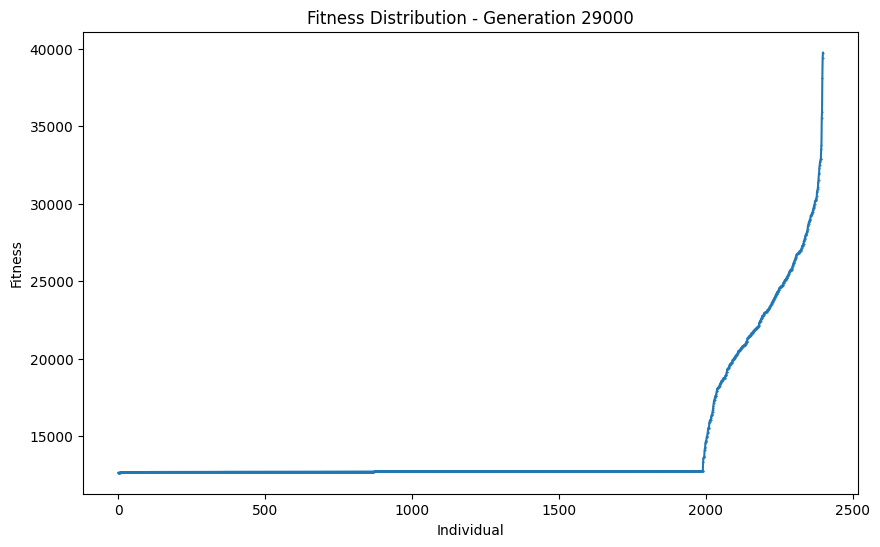

12633
Generation: 29002
Generation: 29004
Generation: 29006
Generation: 29008
Generation: 29010
Generation: 29012
Generation: 29014
Generation: 29016
Generation: 29018
Generation: 29020
Generation: 29022
Generation: 29024
Generation: 29026
Generation: 29028
Generation: 29030
Generation: 29032
Generation: 29034
Generation: 29036
Generation: 29038
Generation: 29040
Generation: 29042
Generation: 29044
Generation: 29046
Generation: 29048
Generation: 29050
Generation: 29052
Generation: 29054
Generation: 29056
Generation: 29058
Generation: 29060
Generation: 29062
Generation: 29064
Generation: 29066
Generation: 29068
Generation: 29070
Generation: 29072
Generation: 29074
Generation: 29076
Generation: 29078
Generation: 29080
Generation: 29082
Generation: 29084
Generation: 29086
Generation: 29088
Generation: 29090
Generation: 29092
Generation: 29094
Generation: 29096
Generation: 29098
Generation: 29100
Generation: 29102
Generation: 29104
Generation: 29106
Generation: 29108
Generation: 29110
Gene

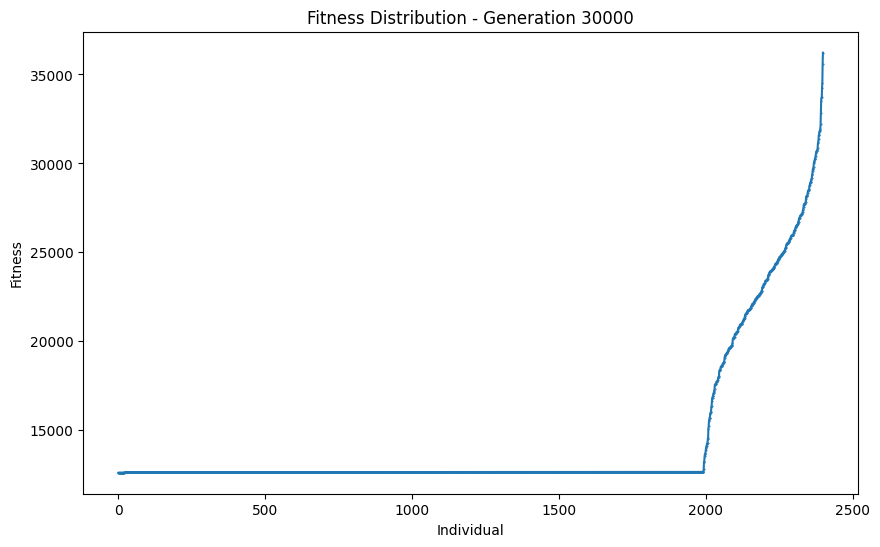

12612
Generation: 30002
Generation: 30004
Generation: 30006
Generation: 30008
Generation: 30010
Generation: 30012
Generation: 30014
Generation: 30016
Generation: 30018
Generation: 30020
Generation: 30022
Generation: 30024
Generation: 30026
Generation: 30028
Generation: 30030
Generation: 30032
Generation: 30034
Generation: 30036
Generation: 30038
Generation: 30040
Generation: 30042
Generation: 30044
Generation: 30046
Generation: 30048
Generation: 30050
Generation: 30052
Generation: 30054
Generation: 30056
Generation: 30058
Generation: 30060
Generation: 30062
Generation: 30064
Generation: 30066
Generation: 30068
Generation: 30070
Generation: 30072
Generation: 30074
Generation: 30076
Generation: 30078
Generation: 30080
Generation: 30082
Generation: 30084
Generation: 30086
Generation: 30088
Generation: 30090
Generation: 30092
Generation: 30094
Generation: 30096
Generation: 30098
Generation: 30100
Generation: 30102
Generation: 30104
Generation: 30106
Generation: 30108
Generation: 30110
Gene

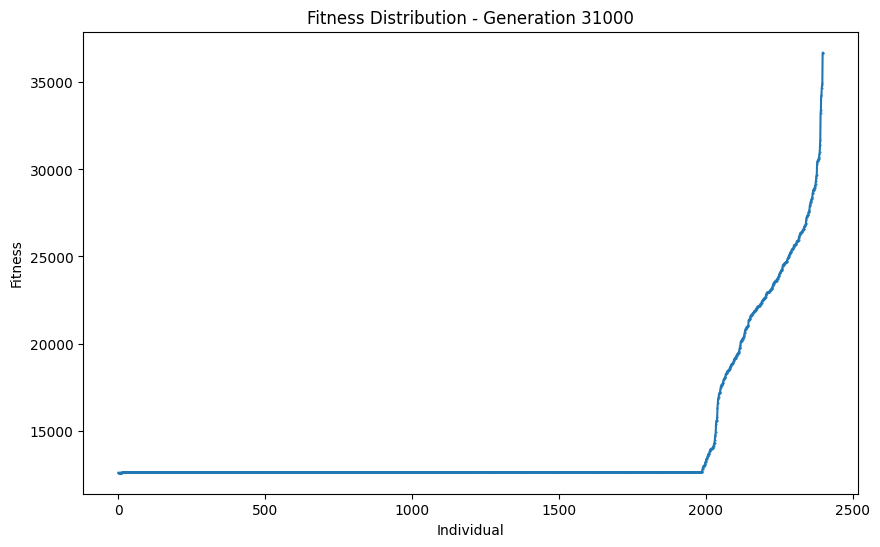

12586
Generation: 31002
Generation: 31004
Generation: 31006
Generation: 31008
Generation: 31010
Generation: 31012
Generation: 31014
Generation: 31016
Generation: 31018
Generation: 31020
Generation: 31022
Generation: 31024
Generation: 31026
Generation: 31028
Generation: 31030
Generation: 31032
Generation: 31034
Generation: 31036
Generation: 31038
Generation: 31040
Generation: 31042
Generation: 31044
Generation: 31046
Generation: 31048
Generation: 31050
Generation: 31052
Generation: 31054
Generation: 31056
Generation: 31058
Generation: 31060
Generation: 31062
Generation: 31064
Generation: 31066
Generation: 31068
Generation: 31070
Generation: 31072
Generation: 31074
Generation: 31076
Generation: 31078
Generation: 31080
Generation: 31082
Generation: 31084
Generation: 31086
Generation: 31088
Generation: 31090
Generation: 31092
Generation: 31094
Generation: 31096
Generation: 31098
Generation: 31100
Generation: 31102
Generation: 31104
Generation: 31106
Generation: 31108
Generation: 31110
Gene

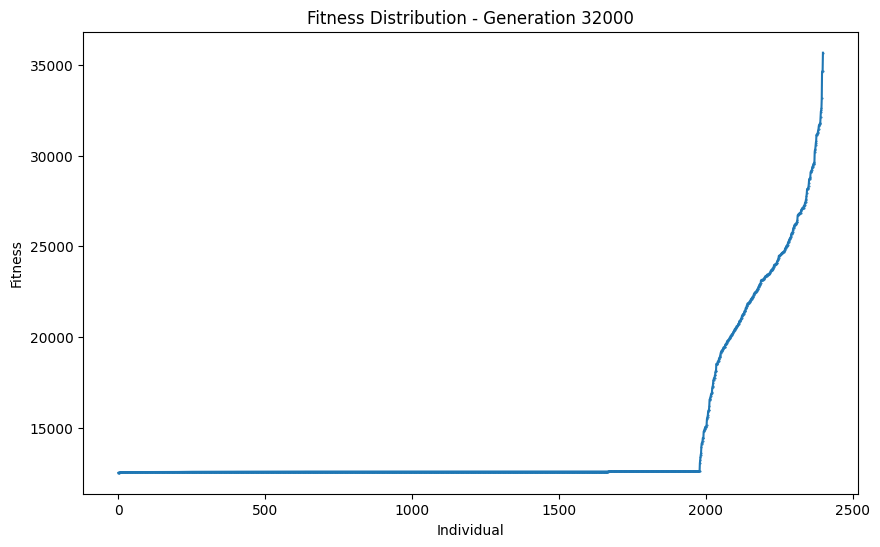

12524
Generation: 32002
Generation: 32004
Generation: 32006
Generation: 32008
Generation: 32010
Generation: 32012
Generation: 32014
Generation: 32016
Generation: 32018
Generation: 32020
Generation: 32022
Generation: 32024
Generation: 32026
Generation: 32028
Generation: 32030
Generation: 32032
Generation: 32034
Generation: 32036
Generation: 32038
Generation: 32040
Generation: 32042
Generation: 32044
Generation: 32046
Generation: 32048
Generation: 32050
Generation: 32052
Generation: 32054
Generation: 32056
Generation: 32058
Generation: 32060
Generation: 32062
Generation: 32064
Generation: 32066
Generation: 32068
Generation: 32070
Generation: 32072
Generation: 32074
Generation: 32076
Generation: 32078
Generation: 32080
Generation: 32082
Generation: 32084
Generation: 32086
Generation: 32088
Generation: 32090
Generation: 32092
Generation: 32094
Generation: 32096
Generation: 32098
Generation: 32100
Generation: 32102
Generation: 32104
Generation: 32106
Generation: 32108
Generation: 32110
Gene

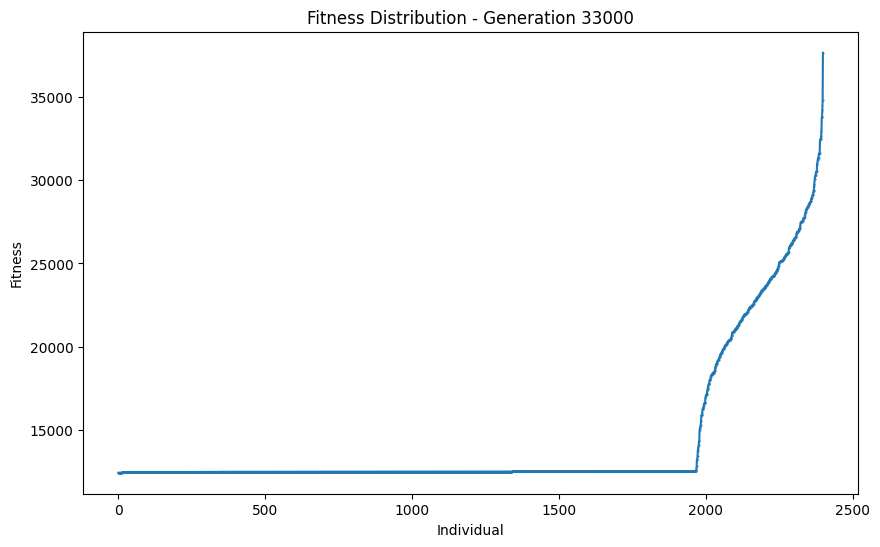

12455
Generation: 33002
Generation: 33004
Generation: 33006
Generation: 33008
Generation: 33010
Generation: 33012
Generation: 33014
Generation: 33016
Generation: 33018
Generation: 33020
Generation: 33022
Generation: 33024
Generation: 33026
Generation: 33028
Generation: 33030
Generation: 33032
Generation: 33034
Generation: 33036
Generation: 33038
Generation: 33040
Generation: 33042
Generation: 33044
Generation: 33046
Generation: 33048
Generation: 33050
Generation: 33052
Generation: 33054
Generation: 33056
Generation: 33058
Generation: 33060
Generation: 33062
Generation: 33064
Generation: 33066
Generation: 33068
Generation: 33070
Generation: 33072
Generation: 33074
Generation: 33076
Generation: 33078
Generation: 33080
Generation: 33082
Generation: 33084
Generation: 33086
Generation: 33088
Generation: 33090
Generation: 33092
Generation: 33094
Generation: 33096
Generation: 33098
Generation: 33100
Generation: 33102
Generation: 33104
Generation: 33106
Generation: 33108
Generation: 33110
Gene

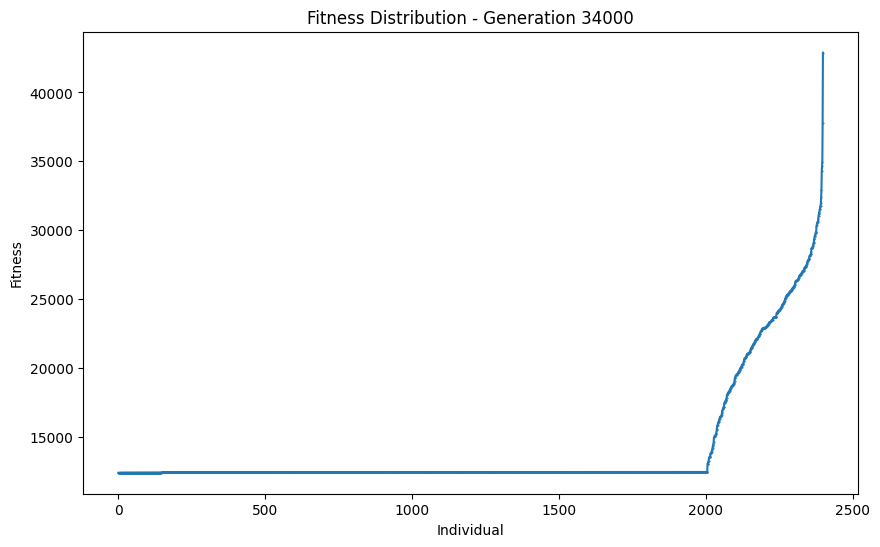

12410
Generation: 34002
Generation: 34004
Generation: 34006
Generation: 34008
Generation: 34010
Generation: 34012
Generation: 34014
Generation: 34016
Generation: 34018
Generation: 34020
Generation: 34022
Generation: 34024
Generation: 34026
Generation: 34028
Generation: 34030
Generation: 34032
Generation: 34034
Generation: 34036
Generation: 34038
Generation: 34040
Generation: 34042
Generation: 34044
Generation: 34046
Generation: 34048
Generation: 34050
Generation: 34052
Generation: 34054
Generation: 34056
Generation: 34058
Generation: 34060
Generation: 34062
Generation: 34064
Generation: 34066
Generation: 34068
Generation: 34070
Generation: 34072
Generation: 34074
Generation: 34076
Generation: 34078
Generation: 34080
Generation: 34082
Generation: 34084
Generation: 34086
Generation: 34088
Generation: 34090
Generation: 34092
Generation: 34094
Generation: 34096
Generation: 34098
Generation: 34100
Generation: 34102
Generation: 34104
Generation: 34106
Generation: 34108
Generation: 34110
Gene

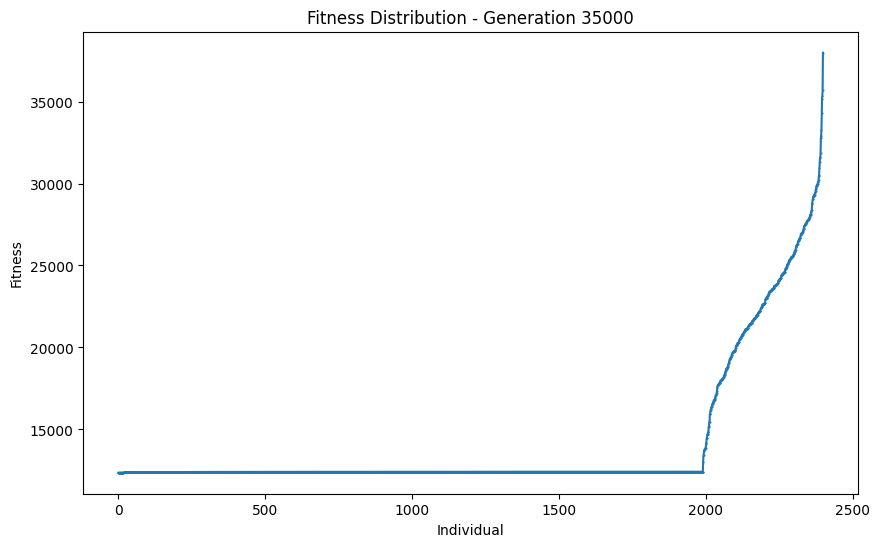

12361
Generation: 35002
Generation: 35004
Generation: 35006
Generation: 35008
Generation: 35010
Generation: 35012
Generation: 35014
Generation: 35016
Generation: 35018
Generation: 35020
Generation: 35022
Generation: 35024
Generation: 35026
Generation: 35028
Generation: 35030
Generation: 35032
Generation: 35034
Generation: 35036
Generation: 35038
Generation: 35040
Generation: 35042
Generation: 35044
Generation: 35046
Generation: 35048
Generation: 35050
Generation: 35052
Generation: 35054
Generation: 35056
Generation: 35058
Generation: 35060
Generation: 35062
Generation: 35064
Generation: 35066
Generation: 35068
Generation: 35070
Generation: 35072
Generation: 35074
Generation: 35076
Generation: 35078
Generation: 35080
Generation: 35082
Generation: 35084
Generation: 35086
Generation: 35088
Generation: 35090
Generation: 35092
Generation: 35094
Generation: 35096
Generation: 35098
Generation: 35100
Generation: 35102
Generation: 35104
Generation: 35106
Generation: 35108
Generation: 35110
Gene

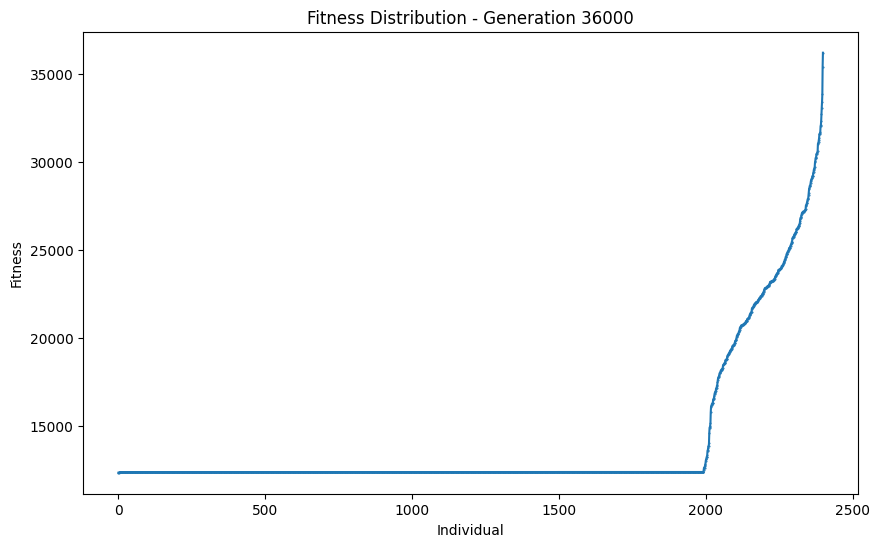

12331
Generation: 36002
Generation: 36004
Generation: 36006
Generation: 36008
Generation: 36010
Generation: 36012
Generation: 36014
Generation: 36016
Generation: 36018
Generation: 36020
Generation: 36022
Generation: 36024
Generation: 36026
Generation: 36028
Generation: 36030
Generation: 36032
Generation: 36034
Generation: 36036
Generation: 36038
Generation: 36040
Generation: 36042
Generation: 36044
Generation: 36046
Generation: 36048
Generation: 36050
Generation: 36052
Generation: 36054
Generation: 36056
Generation: 36058
Generation: 36060
Generation: 36062
Generation: 36064
Generation: 36066
Generation: 36068
Generation: 36070
Generation: 36072
Generation: 36074
Generation: 36076
Generation: 36078
Generation: 36080
Generation: 36082
Generation: 36084
Generation: 36086
Generation: 36088
Generation: 36090
Generation: 36092
Generation: 36094
Generation: 36096
Generation: 36098
Generation: 36100
Generation: 36102
Generation: 36104
Generation: 36106
Generation: 36108
Generation: 36110
Gene

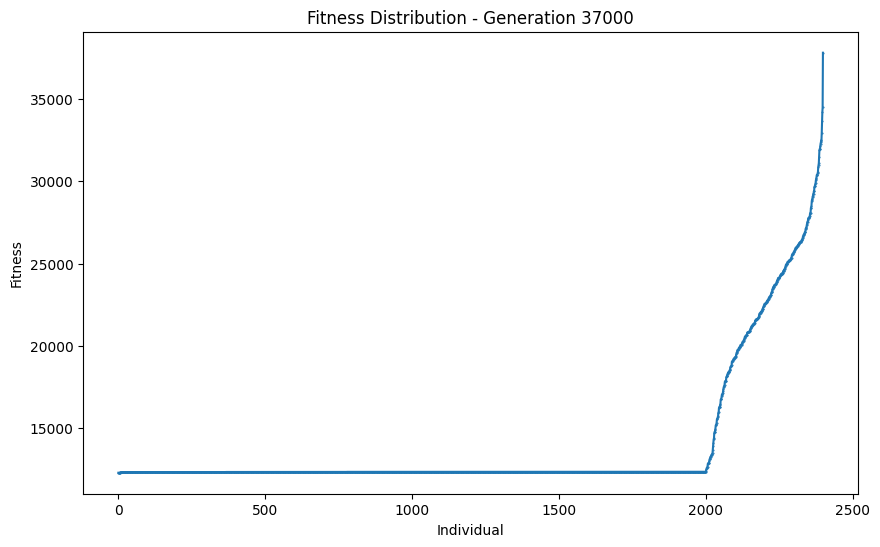

12299
Generation: 37002
Generation: 37004
Generation: 37006
Generation: 37008
Generation: 37010
Generation: 37012
Generation: 37014
Generation: 37016
Generation: 37018
Generation: 37020
Generation: 37022
Generation: 37024
Generation: 37026
Generation: 37028
Generation: 37030
Generation: 37032
Generation: 37034
Generation: 37036
Generation: 37038
Generation: 37040
Generation: 37042
Generation: 37044
Generation: 37046
Generation: 37048
Generation: 37050
Generation: 37052
Generation: 37054
Generation: 37056
Generation: 37058
Generation: 37060
Generation: 37062
Generation: 37064
Generation: 37066
Generation: 37068
Generation: 37070
Generation: 37072
Generation: 37074
Generation: 37076
Generation: 37078
Generation: 37080
Generation: 37082
Generation: 37084
Generation: 37086
Generation: 37088
Generation: 37090
Generation: 37092
Generation: 37094
Generation: 37096
Generation: 37098
Generation: 37100
Generation: 37102
Generation: 37104
Generation: 37106
Generation: 37108
Generation: 37110
Gene

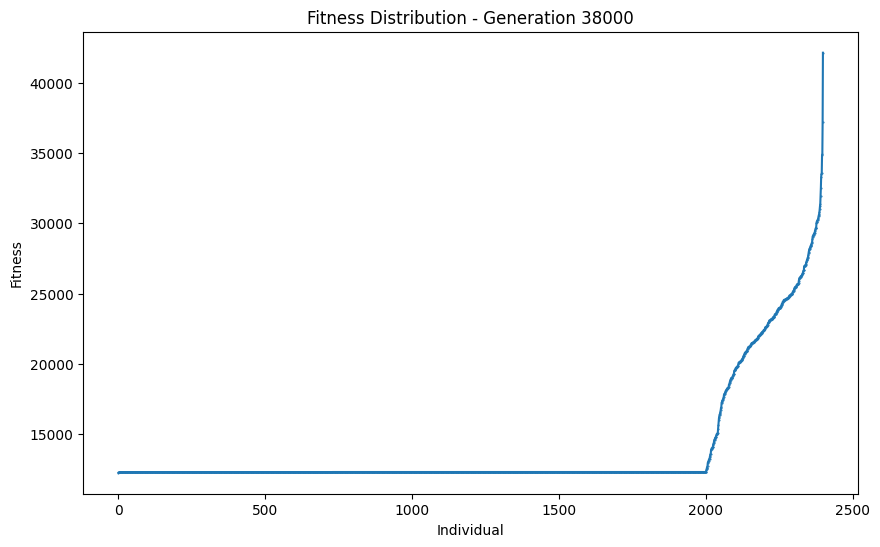

12249
Generation: 38002
Generation: 38004
Generation: 38006
Generation: 38008
Generation: 38010
Generation: 38012
Generation: 38014
Generation: 38016
Generation: 38018
Generation: 38020
Generation: 38022
Generation: 38024
Generation: 38026
Generation: 38028
Generation: 38030
Generation: 38032
Generation: 38034
Generation: 38036
Generation: 38038
Generation: 38040
Generation: 38042
Generation: 38044
Generation: 38046
Generation: 38048
Generation: 38050
Generation: 38052
Generation: 38054
Generation: 38056
Generation: 38058
Generation: 38060
Generation: 38062
Generation: 38064
Generation: 38066
Generation: 38068
Generation: 38070
Generation: 38072
Generation: 38074
Generation: 38076
Generation: 38078
Generation: 38080
Generation: 38082
Generation: 38084
Generation: 38086
Generation: 38088
Generation: 38090
Generation: 38092
Generation: 38094
Generation: 38096
Generation: 38098
Generation: 38100
Generation: 38102
Generation: 38104
Generation: 38106
Generation: 38108
Generation: 38110
Gene

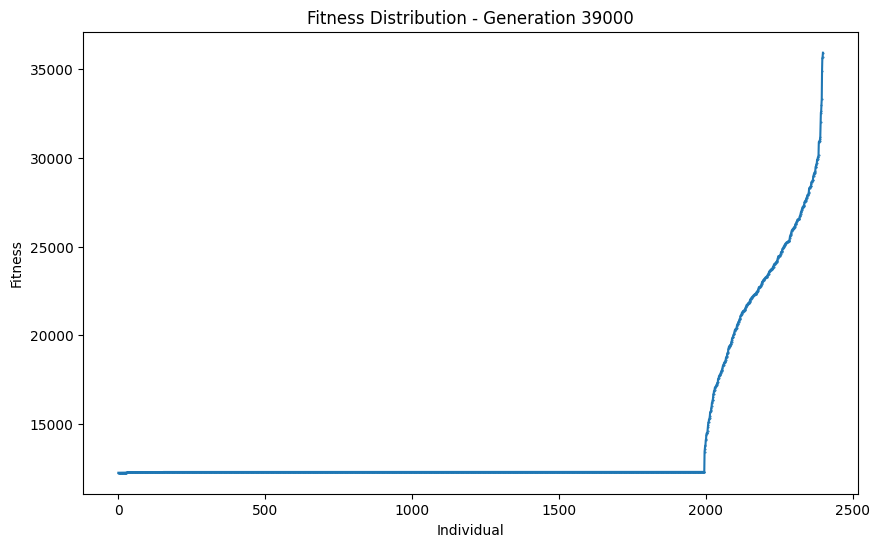

12243
Generation: 39002
Generation: 39004
Generation: 39006
Generation: 39008
Generation: 39010
Generation: 39012
Generation: 39014
Generation: 39016
Generation: 39018
Generation: 39020
Generation: 39022
Generation: 39024
Generation: 39026
Generation: 39028
Generation: 39030
Generation: 39032
Generation: 39034
Generation: 39036
Generation: 39038
Generation: 39040
Generation: 39042
Generation: 39044
Generation: 39046
Generation: 39048
Generation: 39050
Generation: 39052
Generation: 39054
Generation: 39056
Generation: 39058
Generation: 39060
Generation: 39062
Generation: 39064
Generation: 39066
Generation: 39068
Generation: 39070
Generation: 39072
Generation: 39074
Generation: 39076
Generation: 39078
Generation: 39080
Generation: 39082
Generation: 39084
Generation: 39086
Generation: 39088
Generation: 39090
Generation: 39092
Generation: 39094
Generation: 39096
Generation: 39098
Generation: 39100
Generation: 39102
Generation: 39104
Generation: 39106
Generation: 39108
Generation: 39110
Gene

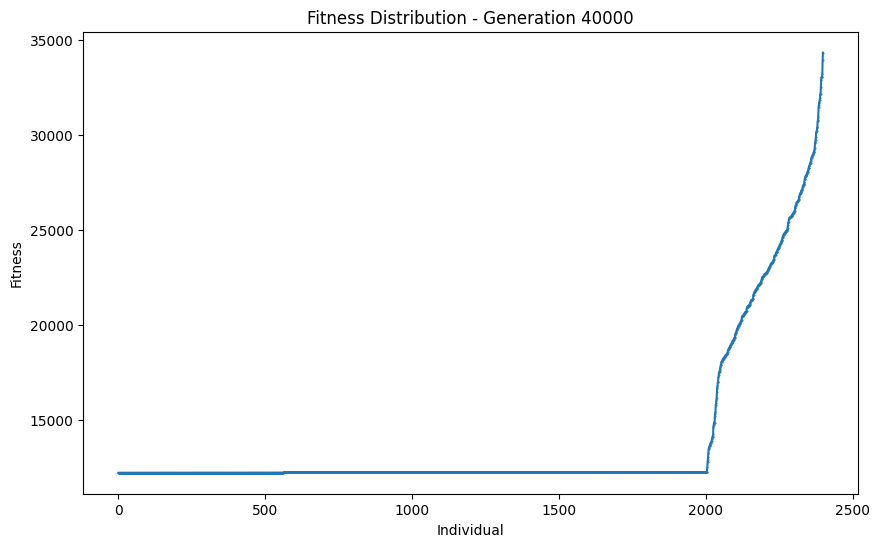

12219
Generation: 40002
Generation: 40004
Generation: 40006
Generation: 40008
Generation: 40010
Generation: 40012
Generation: 40014
Generation: 40016
Generation: 40018
Generation: 40020
Generation: 40022
Generation: 40024
Generation: 40026
Generation: 40028
Generation: 40030
Generation: 40032
Generation: 40034
Generation: 40036
Generation: 40038
Generation: 40040
Generation: 40042
Generation: 40044
Generation: 40046
Generation: 40048
Generation: 40050
Generation: 40052
Generation: 40054
Generation: 40056
Generation: 40058
Generation: 40060
Generation: 40062
Generation: 40064
Generation: 40066
Generation: 40068
Generation: 40070
Generation: 40072
Generation: 40074
Generation: 40076
Generation: 40078
Generation: 40080
Generation: 40082
Generation: 40084
Generation: 40086
Generation: 40088
Generation: 40090
Generation: 40092
Generation: 40094
Generation: 40096
Generation: 40098
Generation: 40100
Generation: 40102
Generation: 40104
Generation: 40106
Generation: 40108
Generation: 40110
Gene

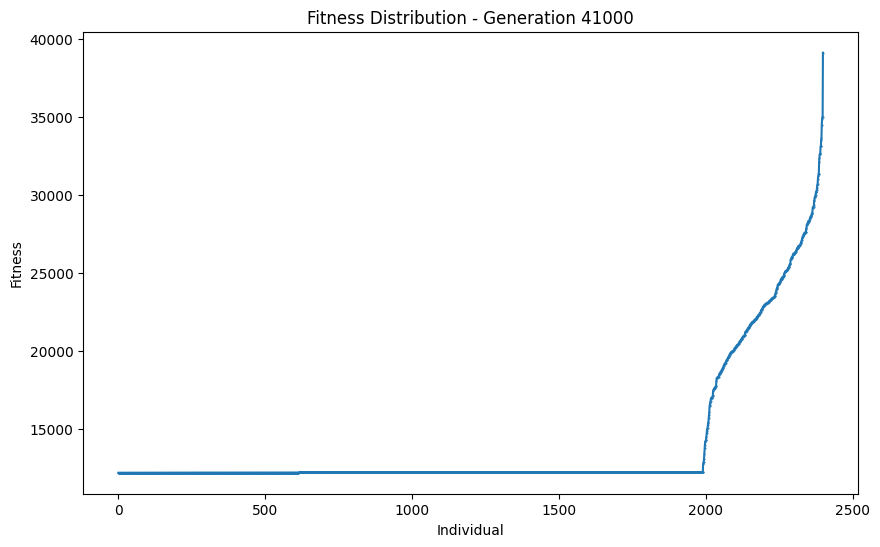

12188
Generation: 41002
Generation: 41004
Generation: 41006
Generation: 41008
Generation: 41010
Generation: 41012
Generation: 41014
Generation: 41016
Generation: 41018
Generation: 41020
Generation: 41022
Generation: 41024
Generation: 41026
Generation: 41028
Generation: 41030
Generation: 41032
Generation: 41034
Generation: 41036
Generation: 41038
Generation: 41040
Generation: 41042
Generation: 41044
Generation: 41046
Generation: 41048
Generation: 41050
Generation: 41052
Generation: 41054
Generation: 41056
Generation: 41058
Generation: 41060
Generation: 41062
Generation: 41064
Generation: 41066
Generation: 41068
Generation: 41070
Generation: 41072
Generation: 41074
Generation: 41076
Generation: 41078
Generation: 41080
Generation: 41082
Generation: 41084
Generation: 41086
Generation: 41088
Generation: 41090
Generation: 41092
Generation: 41094
Generation: 41096
Generation: 41098
Generation: 41100
Generation: 41102
Generation: 41104
Generation: 41106
Generation: 41108
Generation: 41110
Gene

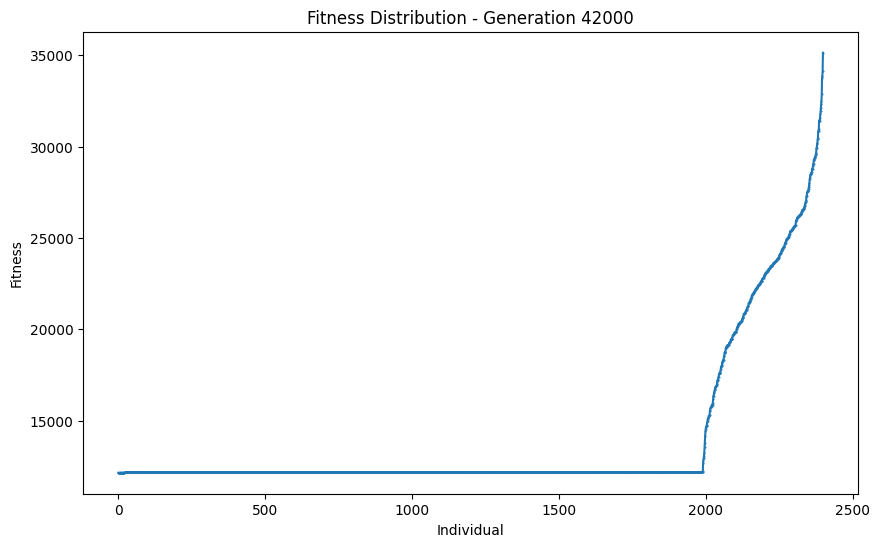

12159
Generation: 42002
Generation: 42004
Generation: 42006
Generation: 42008
Generation: 42010
Generation: 42012
Generation: 42014
Generation: 42016
Generation: 42018
Generation: 42020
Generation: 42022
Generation: 42024
Generation: 42026
Generation: 42028
Generation: 42030
Generation: 42032
Generation: 42034
Generation: 42036
Generation: 42038
Generation: 42040
Generation: 42042
Generation: 42044
Generation: 42046
Generation: 42048
Generation: 42050
Generation: 42052
Generation: 42054
Generation: 42056
Generation: 42058
Generation: 42060
Generation: 42062
Generation: 42064
Generation: 42066
Generation: 42068
Generation: 42070
Generation: 42072
Generation: 42074
Generation: 42076
Generation: 42078
Generation: 42080
Generation: 42082
Generation: 42084
Generation: 42086
Generation: 42088
Generation: 42090
Generation: 42092
Generation: 42094
Generation: 42096
Generation: 42098
Generation: 42100
Generation: 42102
Generation: 42104
Generation: 42106
Generation: 42108
Generation: 42110
Gene

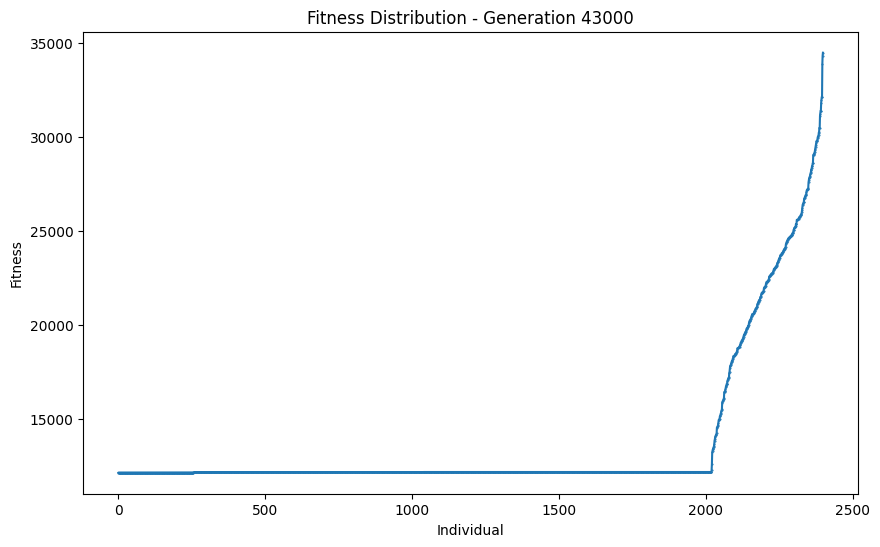

12128
Generation: 43002
Generation: 43004
Generation: 43006
Generation: 43008
Generation: 43010
Generation: 43012
Generation: 43014
Generation: 43016
Generation: 43018
Generation: 43020
Generation: 43022
Generation: 43024
Generation: 43026
Generation: 43028
Generation: 43030
Generation: 43032
Generation: 43034
Generation: 43036
Generation: 43038
Generation: 43040
Generation: 43042
Generation: 43044
Generation: 43046
Generation: 43048
Generation: 43050
Generation: 43052
Generation: 43054
Generation: 43056
Generation: 43058
Generation: 43060
Generation: 43062
Generation: 43064
Generation: 43066
Generation: 43068
Generation: 43070
Generation: 43072
Generation: 43074
Generation: 43076
Generation: 43078
Generation: 43080
Generation: 43082
Generation: 43084
Generation: 43086
Generation: 43088
Generation: 43090
Generation: 43092
Generation: 43094
Generation: 43096
Generation: 43098
Generation: 43100
Generation: 43102
Generation: 43104
Generation: 43106
Generation: 43108
Generation: 43110
Gene

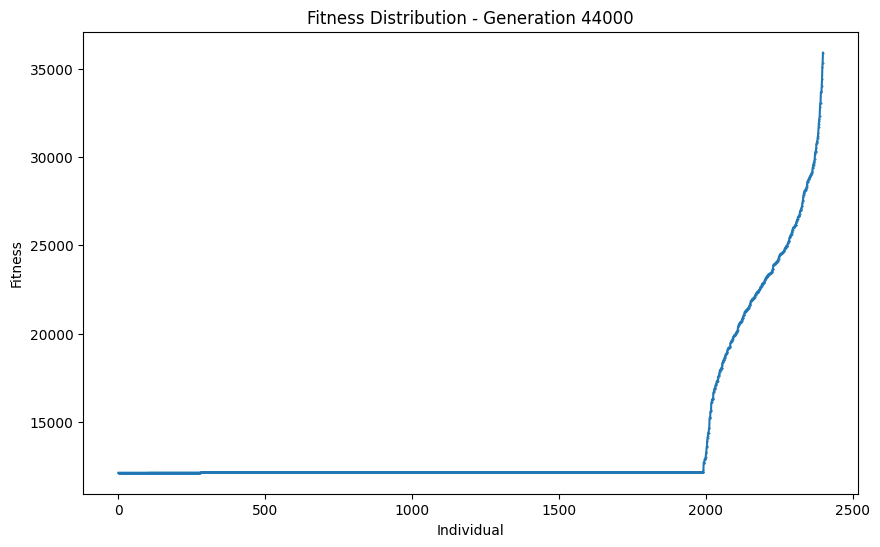

12120
Generation: 44002
Generation: 44004
Generation: 44006
Generation: 44008
Generation: 44010
Generation: 44012
Generation: 44014
Generation: 44016
Generation: 44018
Generation: 44020
Generation: 44022
Generation: 44024
Generation: 44026
Generation: 44028
Generation: 44030
Generation: 44032
Generation: 44034
Generation: 44036
Generation: 44038
Generation: 44040
Generation: 44042
Generation: 44044
Generation: 44046
Generation: 44048
Generation: 44050
Generation: 44052
Generation: 44054
Generation: 44056
Generation: 44058
Generation: 44060
Generation: 44062
Generation: 44064
Generation: 44066
Generation: 44068
Generation: 44070
Generation: 44072
Generation: 44074
Generation: 44076
Generation: 44078
Generation: 44080
Generation: 44082
Generation: 44084
Generation: 44086
Generation: 44088
Generation: 44090
Generation: 44092
Generation: 44094
Generation: 44096
Generation: 44098
Generation: 44100
Generation: 44102
Generation: 44104
Generation: 44106
Generation: 44108
Generation: 44110
Gene

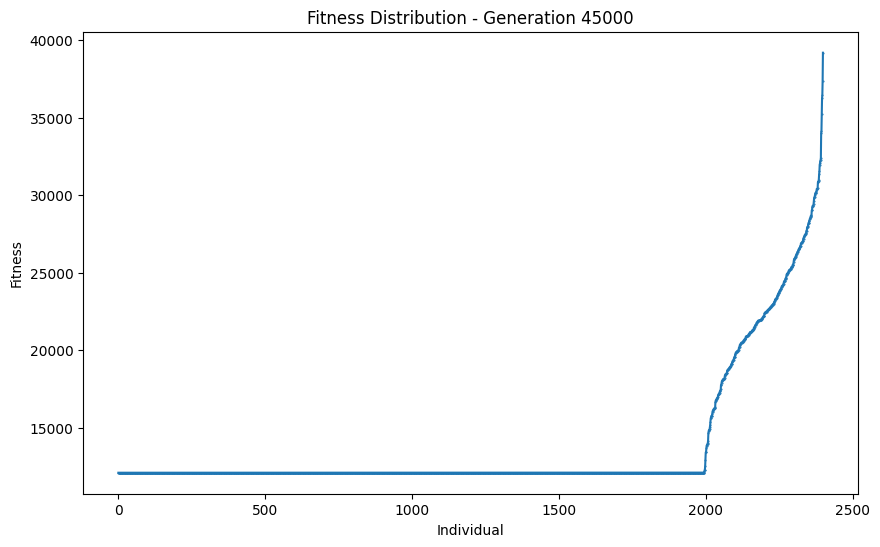

12113
Generation: 45002
Generation: 45004
Generation: 45006
Generation: 45008
Generation: 45010
Generation: 45012
Generation: 45014
Generation: 45016
Generation: 45018
Generation: 45020
Generation: 45022
Generation: 45024
Generation: 45026
Generation: 45028
Generation: 45030
Generation: 45032
Generation: 45034
Generation: 45036
Generation: 45038
Generation: 45040
Generation: 45042
Generation: 45044
Generation: 45046
Generation: 45048
Generation: 45050
Generation: 45052
Generation: 45054
Generation: 45056
Generation: 45058
Generation: 45060
Generation: 45062
Generation: 45064
Generation: 45066
Generation: 45068
Generation: 45070
Generation: 45072
Generation: 45074
Generation: 45076
Generation: 45078
Generation: 45080
Generation: 45082
Generation: 45084
Generation: 45086
Generation: 45088
Generation: 45090
Generation: 45092
Generation: 45094
Generation: 45096
Generation: 45098
Generation: 45100
Generation: 45102
Generation: 45104
Generation: 45106
Generation: 45108
Generation: 45110
Gene

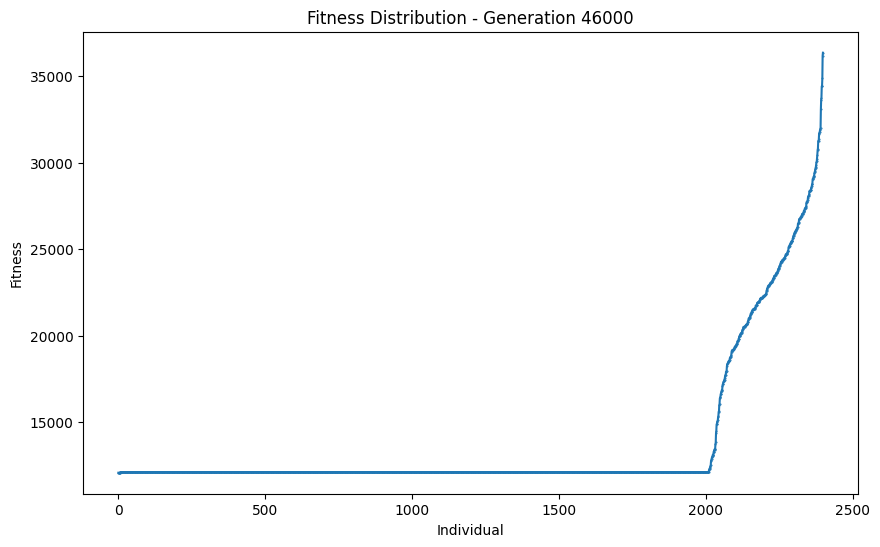

12082
Generation: 46002
Generation: 46004
Generation: 46006
Generation: 46008
Generation: 46010
Generation: 46012
Generation: 46014
Generation: 46016
Generation: 46018
Generation: 46020
Generation: 46022
Generation: 46024
Generation: 46026
Generation: 46028
Generation: 46030
Generation: 46032
Generation: 46034
Generation: 46036
Generation: 46038
Generation: 46040
Generation: 46042
Generation: 46044
Generation: 46046
Generation: 46048
Generation: 46050
Generation: 46052
Generation: 46054
Generation: 46056
Generation: 46058
Generation: 46060
Generation: 46062
Generation: 46064
Generation: 46066
Generation: 46068
Generation: 46070
Generation: 46072
Generation: 46074
Generation: 46076
Generation: 46078
Generation: 46080
Generation: 46082
Generation: 46084
Generation: 46086
Generation: 46088
Generation: 46090
Generation: 46092
Generation: 46094
Generation: 46096
Generation: 46098
Generation: 46100
Generation: 46102
Generation: 46104
Generation: 46106
Generation: 46108
Generation: 46110
Gene

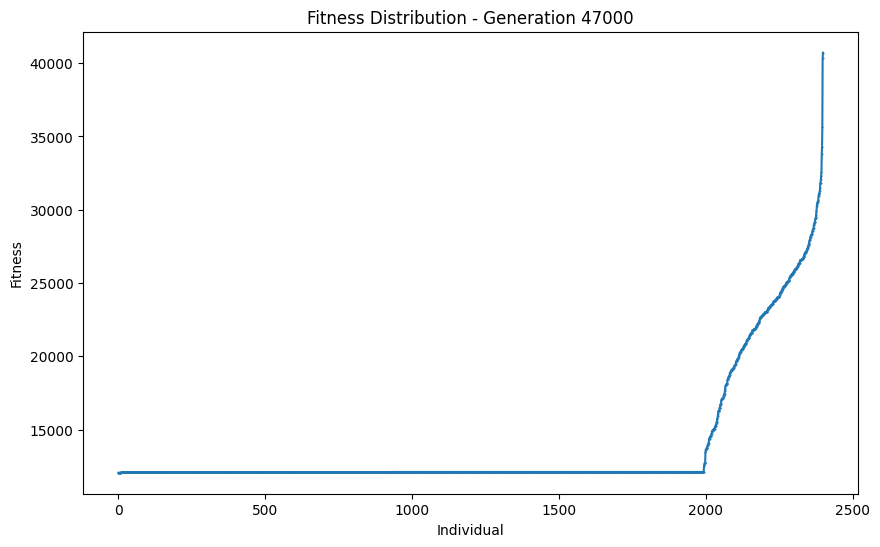

12062
Generation: 47002
Generation: 47004
Generation: 47006
Generation: 47008
Generation: 47010
Generation: 47012
Generation: 47014
Generation: 47016
Generation: 47018
Generation: 47020
Generation: 47022
Generation: 47024
Generation: 47026
Generation: 47028
Generation: 47030
Generation: 47032
Generation: 47034
Generation: 47036
Generation: 47038
Generation: 47040
Generation: 47042
Generation: 47044
Generation: 47046
Generation: 47048
Generation: 47050
Generation: 47052
Generation: 47054
Generation: 47056
Generation: 47058
Generation: 47060
Generation: 47062
Generation: 47064
Generation: 47066
Generation: 47068
Generation: 47070
Generation: 47072
Generation: 47074
Generation: 47076
Generation: 47078
Generation: 47080
Generation: 47082
Generation: 47084
Generation: 47086
Generation: 47088
Generation: 47090
Generation: 47092
Generation: 47094
Generation: 47096
Generation: 47098
Generation: 47100
Generation: 47102
Generation: 47104
Generation: 47106
Generation: 47108
Generation: 47110
Gene

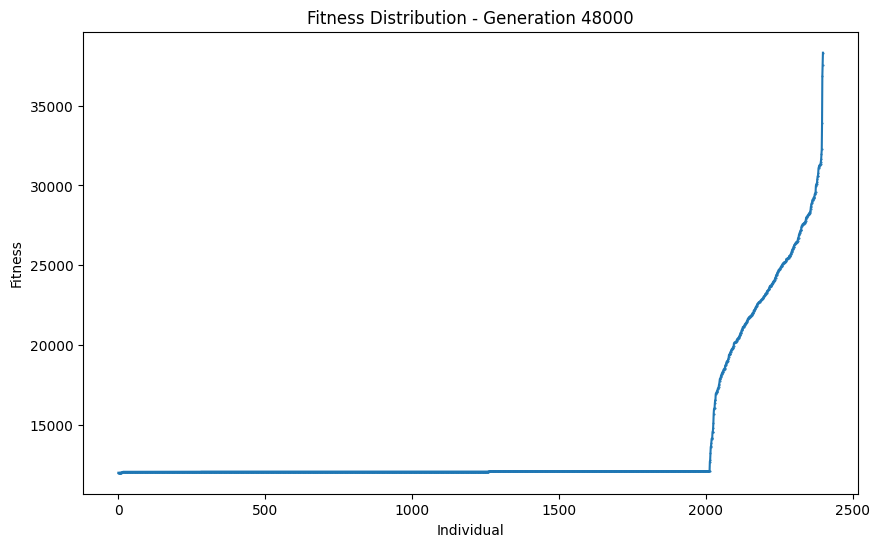

11991
Generation: 48002
Generation: 48004
Generation: 48006
Generation: 48008
Generation: 48010
Generation: 48012
Generation: 48014
Generation: 48016
Generation: 48018
Generation: 48020
Generation: 48022
Generation: 48024
Generation: 48026
Generation: 48028
Generation: 48030
Generation: 48032
Generation: 48034
Generation: 48036
Generation: 48038
Generation: 48040
Generation: 48042
Generation: 48044
Generation: 48046
Generation: 48048
Generation: 48050
Generation: 48052
Generation: 48054
Generation: 48056
Generation: 48058
Generation: 48060
Generation: 48062
Generation: 48064
Generation: 48066
Generation: 48068
Generation: 48070
Generation: 48072
Generation: 48074
Generation: 48076
Generation: 48078
Generation: 48080
Generation: 48082
Generation: 48084
Generation: 48086
Generation: 48088
Generation: 48090
Generation: 48092
Generation: 48094
Generation: 48096
Generation: 48098
Generation: 48100
Generation: 48102
Generation: 48104
Generation: 48106
Generation: 48108
Generation: 48110
Gene

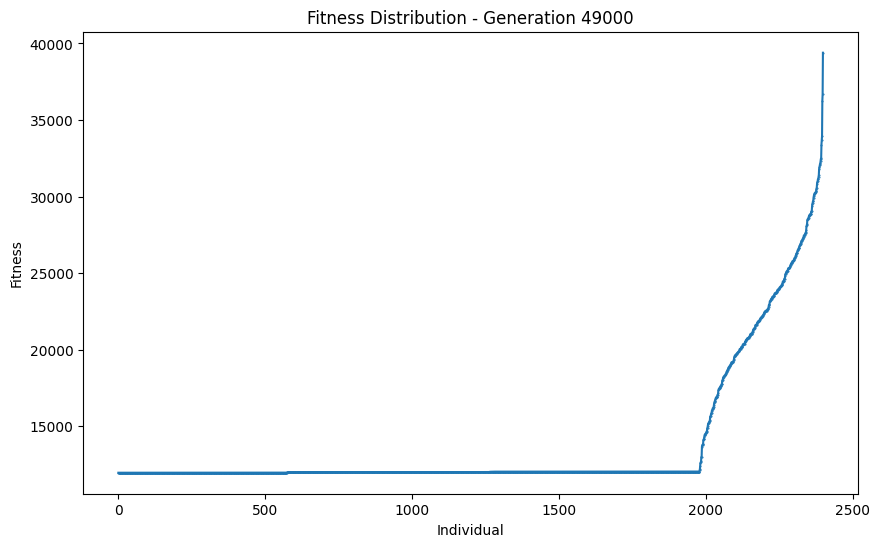

11972
Generation: 49002
Generation: 49004
Generation: 49006
Generation: 49008
Generation: 49010
Generation: 49012
Generation: 49014
Generation: 49016
Generation: 49018
Generation: 49020
Generation: 49022
Generation: 49024
Generation: 49026
Generation: 49028
Generation: 49030
Generation: 49032
Generation: 49034
Generation: 49036
Generation: 49038
Generation: 49040
Generation: 49042
Generation: 49044
Generation: 49046
Generation: 49048
Generation: 49050
Generation: 49052
Generation: 49054
Generation: 49056
Generation: 49058
Generation: 49060
Generation: 49062
Generation: 49064
Generation: 49066
Generation: 49068
Generation: 49070
Generation: 49072
Generation: 49074
Generation: 49076
Generation: 49078
Generation: 49080
Generation: 49082
Generation: 49084
Generation: 49086
Generation: 49088
Generation: 49090
Generation: 49092
Generation: 49094
Generation: 49096
Generation: 49098
Generation: 49100
Generation: 49102
Generation: 49104
Generation: 49106
Generation: 49108
Generation: 49110
Gene

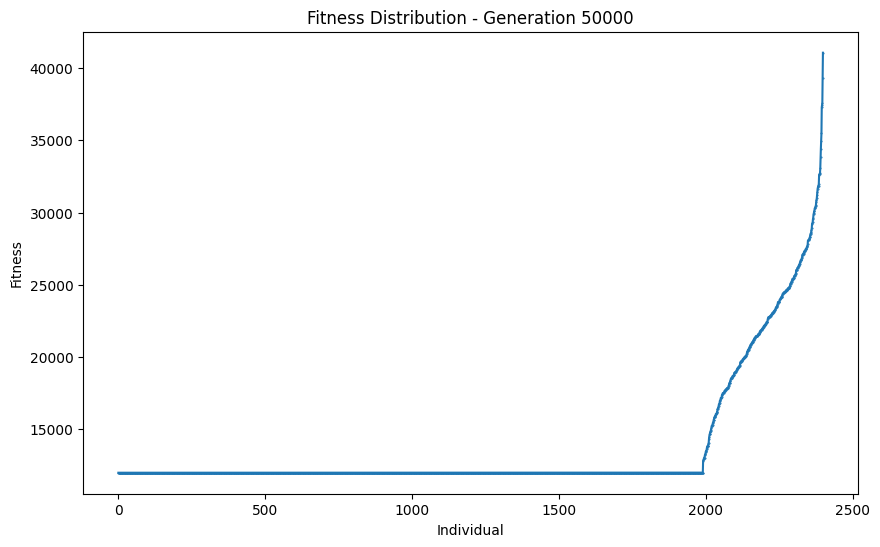

11971
Generation: 50002
Generation: 50004
Generation: 50006
Generation: 50008
Generation: 50010
Generation: 50012
Generation: 50014
Generation: 50016
Generation: 50018
Generation: 50020
Generation: 50022
Generation: 50024
Generation: 50026
Generation: 50028
Generation: 50030
Generation: 50032
Generation: 50034
Generation: 50036
Generation: 50038
Generation: 50040
Generation: 50042
Generation: 50044
Generation: 50046
Generation: 50048
Generation: 50050
Generation: 50052
Generation: 50054
Generation: 50056
Generation: 50058
Generation: 50060
Generation: 50062
Generation: 50064
Generation: 50066
Generation: 50068
Generation: 50070
Generation: 50072
Generation: 50074
Generation: 50076
Generation: 50078
Generation: 50080
Generation: 50082
Generation: 50084
Generation: 50086
Generation: 50088
Generation: 50090
Generation: 50092
Generation: 50094
Generation: 50096
Generation: 50098
Generation: 50100
Generation: 50102
Generation: 50104
Generation: 50106
Generation: 50108
Generation: 50110
Gene

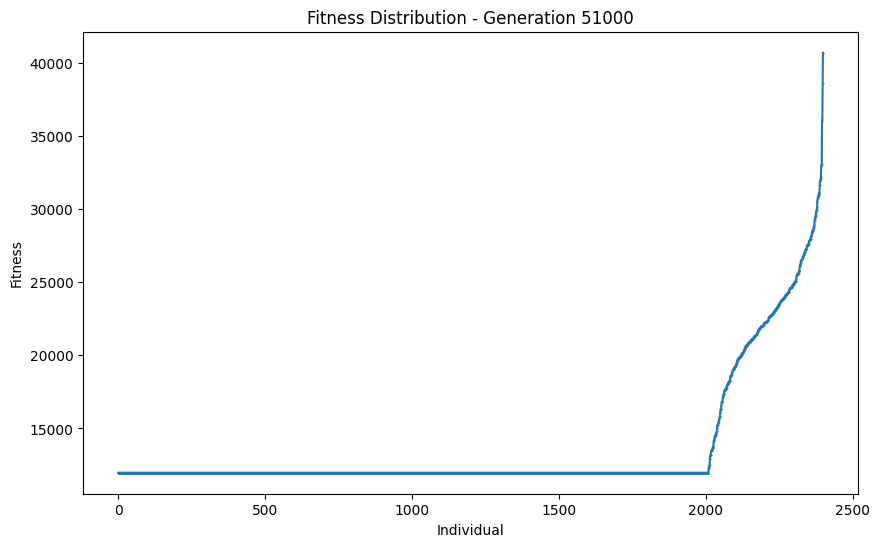

11971
Generation: 51002
Generation: 51004
Generation: 51006
Generation: 51008
Generation: 51010
Generation: 51012
Generation: 51014
Generation: 51016
Generation: 51018
Generation: 51020
Generation: 51022
Generation: 51024
Generation: 51026
Generation: 51028
Generation: 51030
Generation: 51032
Generation: 51034
Generation: 51036
Generation: 51038
Generation: 51040
Generation: 51042
Generation: 51044
Generation: 51046
Generation: 51048
Generation: 51050
Generation: 51052
Generation: 51054
Generation: 51056
Generation: 51058
Generation: 51060
Generation: 51062
Generation: 51064
Generation: 51066
Generation: 51068
Generation: 51070
Generation: 51072
Generation: 51074
Generation: 51076
Generation: 51078
Generation: 51080
Generation: 51082
Generation: 51084
Generation: 51086
Generation: 51088
Generation: 51090
Generation: 51092
Generation: 51094
Generation: 51096
Generation: 51098
Generation: 51100
Generation: 51102
Generation: 51104
Generation: 51106
Generation: 51108
Generation: 51110
Gene

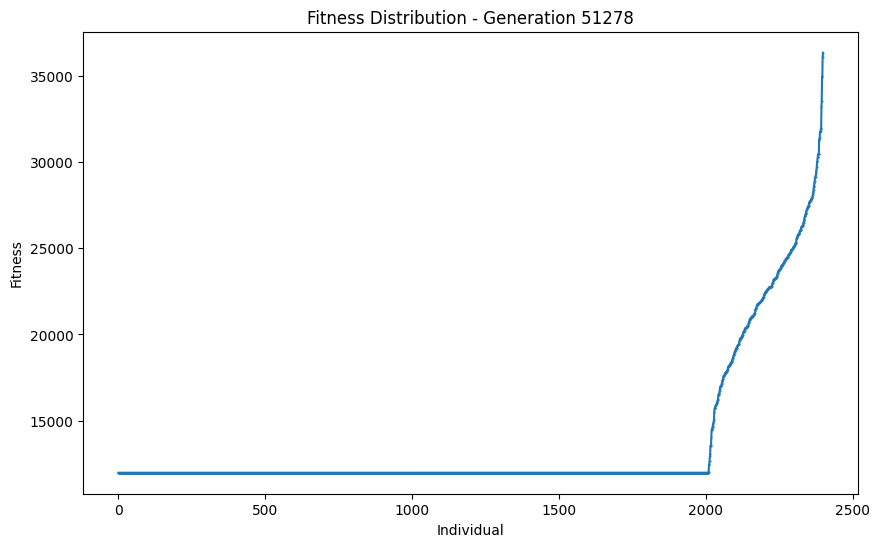

[0, 75, 58, 14, 80, 93, 73, 71, 39, 26, 96, 11, 94, 63, 52, 1, 115, 104, 27, 44, 77, 13, 19, 117, 48, 16, 41, 97, 49, 45, 43, 85, 91, 31, 29, 28, 119, 60, 15, 83, 34, 9, 103, 81, 8, 102, 118, 33, 25, 3, 2, 79, 101, 88, 54, 5, 111, 109, 113, 72, 56, 62, 4, 76, 38, 82, 66, 100, 47, 46, 7, 86, 74, 107, 99, 32, 51, 24, 18, 116, 84, 30, 65, 21, 17, 42, 78, 57, 106, 55, 6, 10, 92, 108, 87, 20, 114, 50, 22, 37, 40, 12, 67, 90, 64, 68, 112, 69, 70, 35, 98, 61, 36, 105, 89, 53, 95, 110, 23, 59, 0] 11971
Percentage Error: 72.44%


In [38]:

NUMBER_OF_TESTS = 1
TOURNAMENT_SIZE = 5

SELECTION_PRESSURE = 1.8
CROSSOVER_PROBABILITY = 1
MUTATION_STEP = 4



import tsplib95
global problem

POPULATION_SIZE = 120*20
NUM_PARENTS = 120*20
NUM_CIDADES = 120
TARGET = 6942



MUTATION_RATE = 0.08
problem = tsplib95.load("gr120.tsp")
test1 = run_test("rank", 80000, 1500, NUMBER_OF_TESTS)
## -----

MUTATION_RATE = 0.3

#test2 = run_test("tournament", 10000, 1500, NUMBER_OF_TESTS)
# ## -----

# MUTATION_RATE = 0.55

#test3 = run_test("tournament", 10000, 1500, NUMBER_OF_TESTS)

In [41]:
getResults(test1, 20000)
#getResults(test2, 1200)
#getResults(test3, 1200)

[[51278]]
Conv: 51278.0
Deviation: 0.0
Mean Error: 72.44309997118987
Standard Deviation: 0.0
Worst: 1615.791846730049
Best: 1615.791846730049
Times it found the optimal solution 0/1


In [33]:
def convert(target, value):
    ratio = (100/937) *(value - 937)
    print("Conveted:", ratio*(target/100)+target)

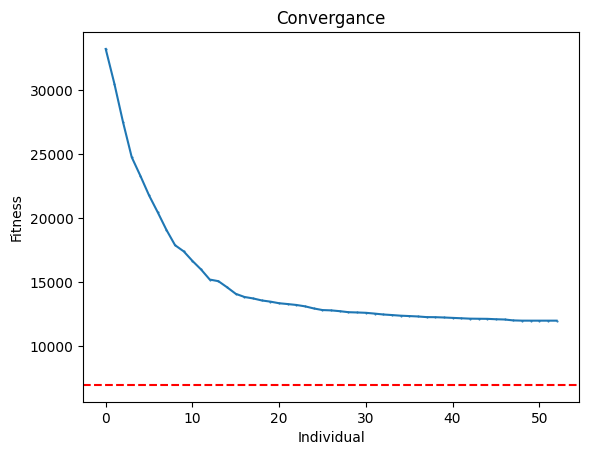

In [42]:
numbers = [33236, 30520, 27502, 24766, 23305, 21774, 20453, 19080, 17875, 17392, 16648, 15975, 15187, 15060, 14582, 14071, 13825, 13710, 13552, 13459, 13334, 13269, 13198, 13090, 12926, 12800, 12775, 12713, 12633, 12612, 12586, 12524, 12455, 12410, 12361, 12331, 12299, 12249, 12243, 12219, 12188, 12159, 12128, 12120, 12113, 12082, 12062, 11991, 11972, 11971, 11971, 11971, 11971]
target = TARGET
plt.plot((numbers), marker='.', markersize=1)
plt.axhline(y=target, color='r', linestyle='--', label='Constant Line')
plt.xlabel('Individual')
plt.ylabel('Fitness')
plt.title(f'Convergance')
plt.show()